# Part I: Research Question
## A. Purpose of the Data Analysis
### A1. Research Question 

The data set selected for this performance assessment is the **churn** data set. The research question for this assessment is:  

*What variables contribute to a customer's income?*

### A2. Goals of the Data Analysis
The goal of this data analysis is to determine influential explanatory variables to develop a multiple regression model that can be used by stakeholders to predict the target variable `Income`, a continuous variable. This model could then be used by stakeholders in their marketing strategies, perhaps with ad campaigns for high-income customers offering premium services, or to market budget-friendly services to low-income customers.

# Part II: Method Justification
## B. Multiple Linear Regression Methods
### B1. Four Assumptions of Multiple Linear Regression
The four assumptions of multiple linear regression are:

- Linearity: there exists a linear relationship between the target and each explanatory variable.
- No Multicollinearity: none of the explanatory variables are highly correlated with each other.
- Homoscedasticity: the residuals have constant variance
- Multivariate Normality: the residuals of the model are normally distributed

(Karir, 2022)

### B2. Benefits of using Python
Python was chosen for the functionality of the many packages available and for the ability to write functions that can be reused throughout the project. The libraries and packages that are essential to this analysis are:

- From **Pandas**, the `.isnull()`, `.duplicated()`, and `.sum()` methods provide some important basic functionality. Additionally, `.quantile()` is used in the detection of outliers and `.value_counts()` is used to count unique elements in data frames.
- From **Matplotlib**, `pyplot` is used to generate histograms and boxplots of variables to observe their distributions and outliers.
- From **Statsmodels**, `OLS()`, `.fit()`, and `.add_constant()` are necessary to produce the multiple regression model.

### B3. Why Multiple Linear Regression is Appropriate 
The research question posed here has a continuous variable as the target variable. Since the goal of this analysis is to construct a model using multiple explanatory variables to predict a continuous response variable, a multiple linear regression model is appropriate.

# Part III: Data Preparation

## C. Summary of the Data Preparation Process

### C1. Data Cleaning Goals

Before constructing the model, first the data set will be cleaned and treated. The plan to clean the data set involves detecting and treating duplicates, missing values, and outliers, and the re-expression of categorical variables. The steps and techniques necessary to perform these tasks is given:  

- Duplicates:
    - Duplicates are detected below by chaining the `.duplicated()` and `.sum()` methods from the `Pandas` library and calling them on the data frame, returning the total count of duplicate observations. It is shown below that there are no duplicate rows.
- Missing Values:
    - Missing values are detected below by chaining the `.isnull()` and `.sum()` methods from the `Pandas` library and calling them on the data frame, returning the total count of missing values for each variable. Since the `InternetService` variable has `None` as one of its options, the 2129 erroneously identified null values are imputed with `None` to avoid being interpreted as nulls. It is shown below that there are no other missing values.
- Outliers:
    - The outliers of the following thirteen **quantitative variables** are identified using the `boxplot()` function from the `matplotlib` library and counted below using a user-defined function. It is shown below that there are no unacceptable/unreasonable outliers, so all outliers shown here will be retained.
        - Income: Annual income of customer (**continuous numeric data**)
        - Lat: GPS coordinates of the latitude of the customer residence (**continuous numeric data**)
        - Lng: GPS coordinates of the longitude of the customer residence (**continuous numeric data**)
        - Population: Population within a mile radius of customer (**discrete numeric data**)
        - Children: Number of children in customer’s household (**discrete numeric data**)
        - Age: Age of customer (**continuous numeric data**)
        - Outage_sec_perweek: Average number of seconds per week of system outages in the customer’s neighborhood (**continuous numeric data**)
        - Email: Number of emails sent to the customer in the last year (marketing or correspondence) (**discrete numeric data**)
        - Contacts: Number of times customer contacted technical support (**discrete numeric data**)
        - Yearly_equip_failure: The number of times customer’s equipment failed and had to be reset/replaced in the past year (**discrete numeric data**)
        - Tenure: Number of months the customer has stayed with the provider (**continuous numeric data**)
        - MonthlyCharge: The amount charged, on average, per customer monthly (**continuous numeric data**)
        - Bandwidth_GB_Year: The average amount of data used, in GB, in a year by the customer (**continuous numeric data**)
- Re-expression of Categorical Variables: 
    - The following thirteen **binary nominal categorical variables** are re-expressed below using binary encoding:
        - `Churn`: Whether the customer discontinued service within the last month (yes, no)
        - `Techie`: Whether the customer considers themselves technically inclined (yes, no)
        - `Port_modem`: Whether the customer has a portable modem (yes, no) 
        - `Tablet`: Whether the customer owns a tablet such as iPad, Surface, etc. (yes, no) 
        - `Phone`: Whether the customer has a phone service (yes, no) 
        - `Multiple`: Whether the customer has multiple lines (yes, no)
        - `OnlineSecurity`: Whether the customer has an online security add-on (yes, no) 
        - `OnlineBackup`: Whether the customer has an online backup add-on (yes, no)
        - `DeviceProtection`: Whether the customer has device protection add-on (yes, no)
        - `TechSupport`: Whether the customer has a technical support add-on (yes, no) 
        - `StreamingTV`: Whether the customer has streaming TV (yes, no) 
        - `StreamingMovies`: Whether the customer has streaming movies (yes, no)
        - `PaperlessBilling`: Whether the customer has paperless billing (yes, no) 
    - The following six **nominal categorical variables** are re-expressed below using one-hot encoding:
        - `Area`: Area type (rural, urban, suburban) 
        - `Marital`: Marital status of customer 
        - `Gender`: Customer self-identification as male, female, or nonbinary 
        - `Contract`: The contract term of the customer (month-to-month, one year, two year)
        - `InternetService`: Customer’s internet service provider (DSL, fiber optic, None) 
        - `PaymentMethod`: The customer’s payment method (electronic check, mailed check, bank (automatic bank transfer), credit card (automatic)) 
     - If variables have too many unique values, re-expressing them will increase the dimensionality of the model (Middleton, 2022). For this reason, the following categorical variables will be omitted from the model:
        - `City`: Customer city of residence 
        - `State`: Customer state of residence 
        - `County`: Customer county of residence 
        - `Zip`: Customer zip code of residence 
        - `TimeZone`: Time zone of customer residence based on customer sign-up information 
        - `Job`: Job of the customer/invoiced person 

In [1]:
## C1 The following cells include the annotated code used to clean the data.
# See code attached, in D208_PA_MendezD_Task1_Revision1.ipynb


# Import the Pandas library, then load the data into a data frame with Pandas' .read_csv() function
import pandas as pd 
df = pd.read_csv('/Users/drewmendez/Documents/WGU/D208/churn_d208/churn_clean.csv')

def printDupesNulls(data_frame):
# Detect duplicates with Pandas' .duplicated method chained with .sum() method.
# Identify missing values in the data frame with Pandas' .isnull() method, 
# then sum the resulting series with the .sum() method
    
    duplicate_count = data_frame.duplicated().sum()
    missing_values_count = data_frame.isnull().sum()
    print('Number of duplicate rows:', duplicate_count)
    print("Number of missing values per variable:")
    print(missing_values_count)
    
printDupesNulls(df)

Number of duplicate rows: 0
Number of missing values per variable:
CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
Onlin

In [2]:
## C1 Treatment of NAs

# Since the 'InternetService' variable has 'None' as one of its options,
# it is necessary to impute 'None' 

df['InternetService'].fillna('None', inplace=True)

# Verify that 'None' no longer appears as 'Null'
print('Number of `InternetService` nulls:', df['Tenure'].isnull().sum())


Number of `InternetService` nulls: 0


In [3]:
## C1 Detect and Count Outliers of Numeric Variables

import matplotlib.pyplot as plt

def boxplotOutliers(data_frame, col_name):
# Visualize outliers using boxplot() from matplotlib
# First and third quartiles, Q1 and Q3, are found using .quantile() from Pandas,
# then the interquartile range is found using IQR = Q3 - Q1.
# The upper whisker of the boxplot is found using max = Q3 + 1.5 * IQR.
# The lower whisker of the boxplot is found using min = Q1 - 1.5 * IQR.
# The .sum() method returns the count of observations greater than the max or less than the min.
# The .round() method rounds the outlier count to two decimals.
# If loop to print corresponding outputs
    
    plt.boxplot(data_frame[col_name])
    plt.title(f'Boxplot of {col_name}')
    plt.show()
    
    Q1 = data_frame[col_name].quantile(0.25)
    Q3 = data_frame[col_name].quantile(0.75)
    IQR = Q3 - Q1
    maximum = round(Q3 + 1.5 * IQR, 2)
    minimum = round(Q1 - 1.5 * IQR, 2)
    outlier_count_up = (data_frame[col_name] > maximum).sum()
    outlier_count_low = (data_frame[col_name] < minimum).sum()
    
    
    if outlier_count_up > 0:
        if outlier_count_low > 0:
            print(f'For the `{col_name}` variable, all observations greater than {maximum} or less than {minimum} are considered outliers.')
            print(f'The count of observations greater than {maximum} is {outlier_count_up}.')
            print(f'The count of observations less than {minimum} is {outlier_count_low}.')
        if outlier_count_low == 0:
            print(f'For the `{col_name}` variable, all observations greater than {maximum} are considered outliers.')
            print(f'The count of observations greater than {maximum} is {outlier_count_up}.')
    if outlier_count_up == 0:
        if outlier_count_low > 0:
            print(f'For the `{col_name}` variable, all observations less than {minimum} are considered outliers.')
            print(f'The count of observations less than {minimum} is {outlier_count_low}.')
        if outlier_count_low == 0:
            print(f'There are no outliers for the `{col_name}` variable.')
    

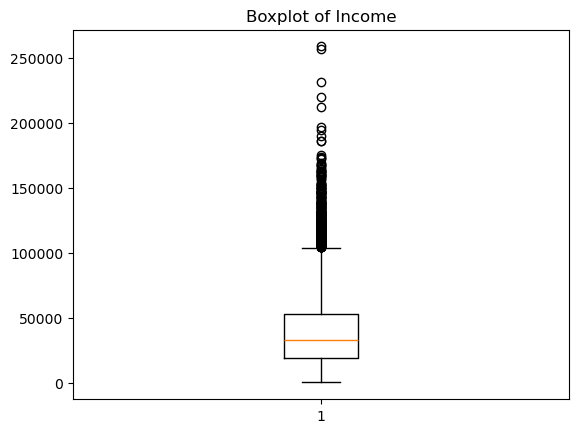

For the `Income` variable, all observations greater than 104278.35 are considered outliers.
The count of observations greater than 104278.35 is 336.


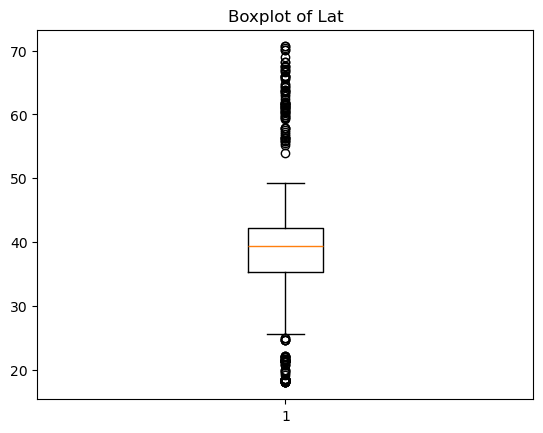

For the `Lat` variable, all observations greater than 52.25 or less than 25.19 are considered outliers.
The count of observations greater than 52.25 is 77.
The count of observations less than 25.19 is 81.


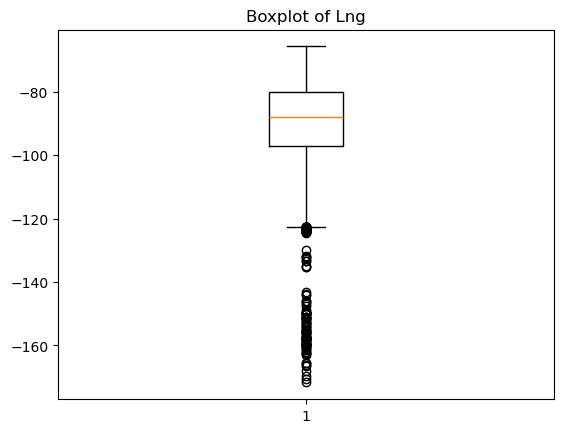

For the `Lng` variable, all observations less than -122.57 are considered outliers.
The count of observations less than -122.57 is 273.


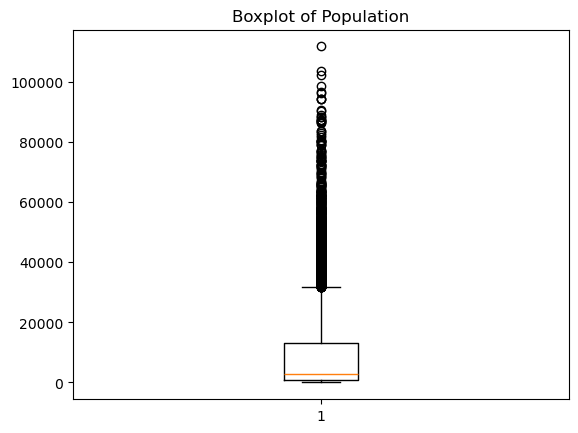

For the `Population` variable, all observations greater than 31813.0 are considered outliers.
The count of observations greater than 31813.0 is 937.


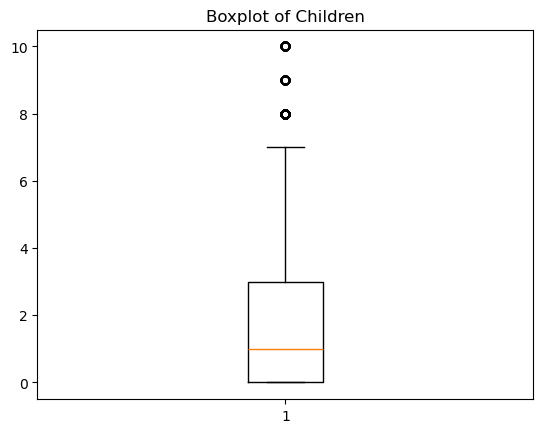

For the `Children` variable, all observations greater than 7.5 are considered outliers.
The count of observations greater than 7.5 is 401.


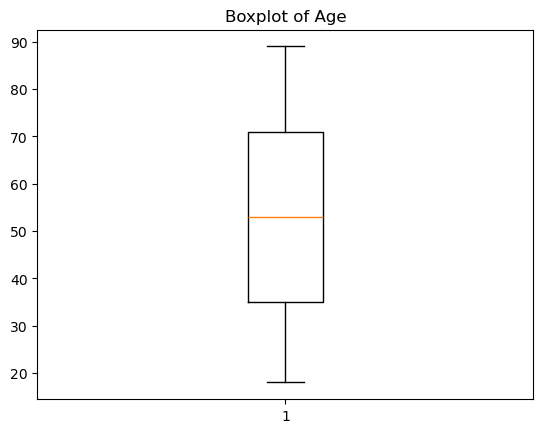

There are no outliers for the `Age` variable.


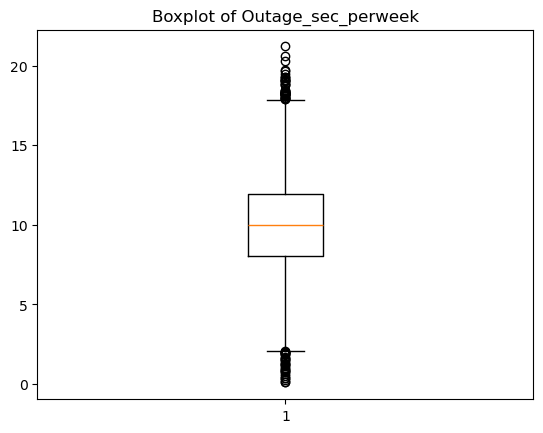

For the `Outage_sec_perweek` variable, all observations greater than 17.9 or less than 2.09 are considered outliers.
The count of observations greater than 17.9 is 43.
The count of observations less than 2.09 is 33.


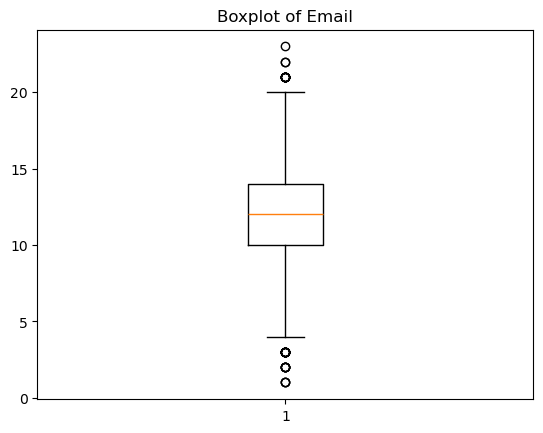

For the `Email` variable, all observations greater than 20.0 or less than 4.0 are considered outliers.
The count of observations greater than 20.0 is 15.
The count of observations less than 4.0 is 23.


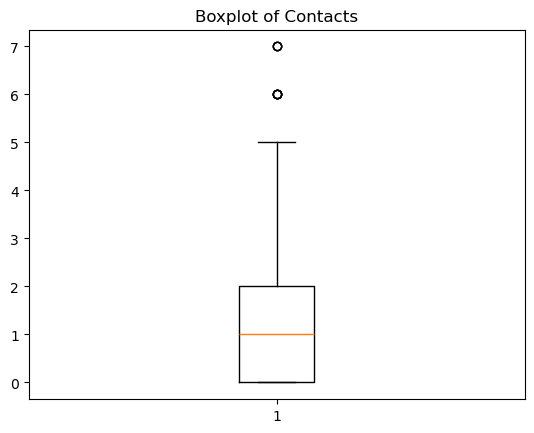

For the `Contacts` variable, all observations greater than 5.0 are considered outliers.
The count of observations greater than 5.0 is 8.


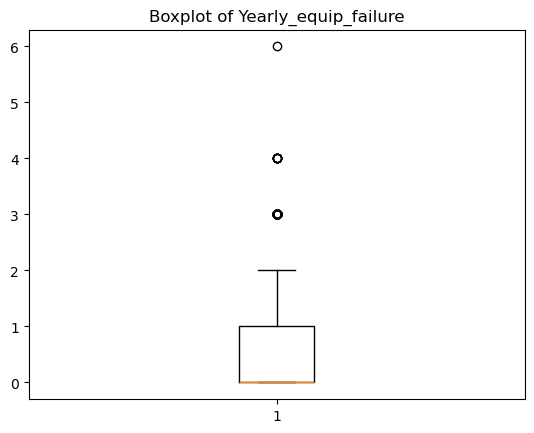

For the `Yearly_equip_failure` variable, all observations greater than 2.5 are considered outliers.
The count of observations greater than 2.5 is 94.


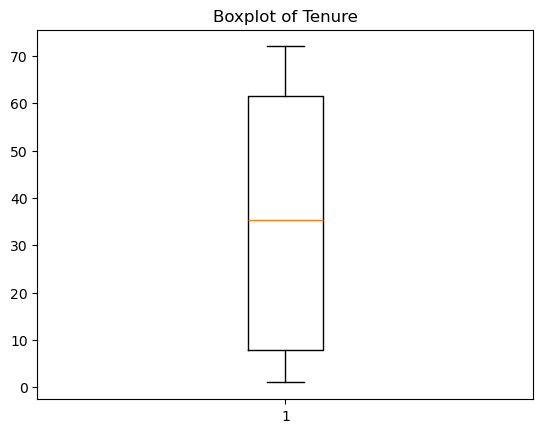

There are no outliers for the `Tenure` variable.


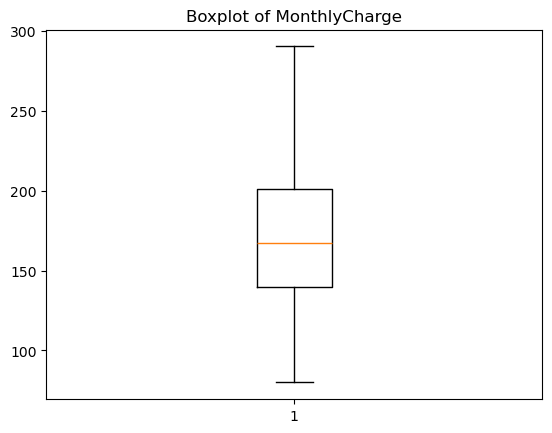

There are no outliers for the `MonthlyCharge` variable.


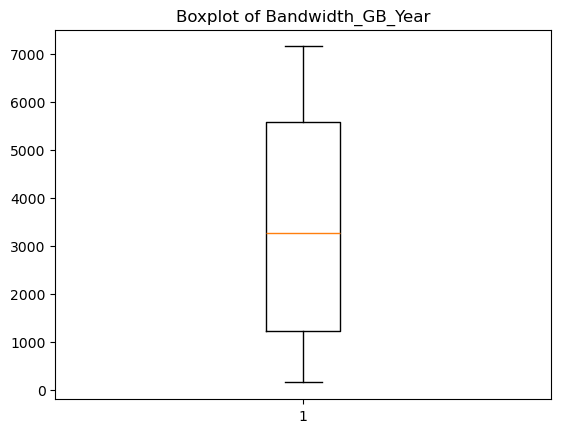

There are no outliers for the `Bandwidth_GB_Year` variable.


In [4]:
# C1 Detection of Outliers for 13 Numeric Variables

boxplotOutliers(df, 'Income')

boxplotOutliers(df, 'Lat')

boxplotOutliers(df, 'Lng')

boxplotOutliers(df, 'Population')

boxplotOutliers(df, 'Children')

boxplotOutliers(df, 'Age')

boxplotOutliers(df, 'Outage_sec_perweek')

boxplotOutliers(df, 'Email')

boxplotOutliers(df, 'Contacts')

boxplotOutliers(df, 'Yearly_equip_failure')

boxplotOutliers(df, 'Tenure')

boxplotOutliers(df, 'MonthlyCharge')

boxplotOutliers(df, 'Bandwidth_GB_Year')

In [5]:
## C1 Binary Encoding Re-expression of the 12 Binary Variables

# Create a list of the columns that will be encoded
binaryList = ['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 
                 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

# Run a loop that replaces all 'Yes' with 1 and 'No' with 0 for each column in the list above
for column in binaryList:
    df[column] = df[column].replace({'Yes': 1, 'No': 0})
    
binaryVars = df[['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 
                 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']]


In [6]:
## C1 One-Hot Encoding Re-expression of the Six Categorical Variables

# Create additional data frame from variables being re-expressed
oneHotVars = df[['Area', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod']]

# Apply one-hot encoding, dropping first column to avoid multi-collinearity in the model
oneHotVars = pd.get_dummies(oneHotVars, drop_first = True, dtype = int)  

# Concatenate one-hot data frame with original data frame
# retain original variables for summaries
df = pd.concat([df, oneHotVars], axis=1) 


### C2. Summary Statistics of Dependent Variable and Independent Variables

The dependent variable for this multiple regression model will be the continuous variable `Income`.

The independent variables for the initial model will be:

- all twelve numeric variables
    - `Lat`, `Lng`, `Population`, `Children`, `Age`, `Outage_sec_perweek`, `Email`, `Contacts`, `Yearly_equip_failure`, `Tenure`, `MonthlyCharge`, `Bandwidth_GB_Year`
- all thirteen re-expressed binary variables
    - `Churn`, `Techie`, `Port_modem`, `Tablet`, `Phone`, `Multiple`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `PaperlessBilling`
- all six categorical variables re-expressed with one-hot encoding
    - `Area`, `Marital`, `Gender`, `Contract`, `InternetService`, `PaymentMethod`
- all eight ordinal variables
    - `Item1`, `Item2`, `Item3`, `Item4`, `Item5`, `Item6`, `Item7`, `Item8`

The written descriptions of the summary statistics for these variables are shown below.



In [7]:
## C2 Summaries of Numeric and Ordinal Variables

print('Summary of Dependent Variable `Income`')
print(df['Income'].describe())

numericVars = df[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Outage_sec_perweek', 'Email', 
          'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

ordinalVars = df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]

print('Summaries of Independent Variables')
print(numericVars.describe())

print('Summaries of Ordinal Variables')
print(ordinalVars.describe())


Summary of Dependent Variable `Income`
count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64
Summaries of Independent Variables
                Lat           Lng     Population    Children           Age  \
count  10000.000000  10000.000000   10000.000000  10000.0000  10000.000000   
mean      38.757567    -90.782536    9756.562400      2.0877     53.078400   
std        5.437389     15.156142   14432.698671      2.1472     20.698882   
min       17.966120   -171.688150       0.000000      0.0000     18.000000   
25%       35.341828    -97.082812     738.000000      0.0000     35.000000   
50%       39.395800    -87.918800    2910.500000      1.0000     53.000000   
75%       42.106908    -80.088745   13168.000000      3.0000     71.000000   
max       70.640660    -65.667850  111850.000000     10.0000     89.000000   

       Out

In [8]:
## C2 Summaries of Numeric Variables

def quantDesc(data_frame, col_name):
# Provide written description of the statistical summary output of .describe()

    count, mean, std, minimum, quarter, half, seventyfive, maximum = data_frame[col_name].describe()
    
    print(f'For the variable `{col_name}`:')
    print(f'There are {count} observations.')
    print(f'On average, the data tends towards the mean, which is {round(mean, 2)}.')
    print(f'The standard deviation {round(std, 2)} is the amount of variation, or how much the data differs from the mean.')
    print(f'The smallest observation is {round(minimum, 2)}.')
    print(f'25% of the data falls below {round(quarter, 2)}.')
    print(f'50% of the data falls below {round(half, 2)}.')
    print(f'75% of the data falls below {round(seventyfive, 2)}.')
    print(f'100% of the data falls below the largest observation, {round(maximum, 2)}.')
    print('\n')


In [9]:
## C2 Summaries of 13 Numeric Variables

quantDesc(df, 'Income')

quantDesc(df, 'Population')

quantDesc(df, 'Children')

quantDesc(df, 'Age')

quantDesc(df, 'Outage_sec_perweek')

quantDesc(df, 'Email')

quantDesc(df, 'Contacts')

quantDesc(df, 'Yearly_equip_failure')

quantDesc(df, 'Tenure')

quantDesc(df, 'MonthlyCharge')

quantDesc(df, 'Bandwidth_GB_Year')

quantDesc(df, 'Lat')

quantDesc(df, 'Lng')

For the variable `Income`:
There are 10000.0 observations.
On average, the data tends towards the mean, which is 39806.93.
The standard deviation 28199.92 is the amount of variation, or how much the data differs from the mean.
The smallest observation is 348.67.
25% of the data falls below 19224.72.
50% of the data falls below 33170.6.
75% of the data falls below 53246.17.
100% of the data falls below the largest observation, 258900.7.


For the variable `Population`:
There are 10000.0 observations.
On average, the data tends towards the mean, which is 9756.56.
The standard deviation 14432.7 is the amount of variation, or how much the data differs from the mean.
The smallest observation is 0.0.
25% of the data falls below 738.0.
50% of the data falls below 2910.5.
75% of the data falls below 13168.0.
100% of the data falls below the largest observation, 111850.0.


For the variable `Children`:
There are 10000.0 observations.
On average, the data tends towards the mean, which is 2.09.
T

In [10]:
## C2 Summaries of Binary Variables

def binarySummary(data_frame, col_name):
# Get the counts, convert counts to percentages, 
# and calculate and display summary statistics
    
    counts = data_frame[col_name].value_counts()
    percentages = counts / counts.sum() * 100
    
    summary_stats = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    summary_stats = summary_stats.rename(index={0: 'no', 1: 'yes'}) 
    
    print(f'Summary of `{col_name}`')
    print(summary_stats)
    print('\n')

In [11]:
## C2 Summaries of 13 Binary Variables

binarySummary(df, 'Churn')

binarySummary(df, 'Techie')

binarySummary(df, 'Port_modem')

binarySummary(df, 'Tablet')

binarySummary(df, 'Phone')

binarySummary(df, 'Multiple')

binarySummary(df, 'OnlineSecurity')

binarySummary(df, 'OnlineBackup')

binarySummary(df, 'DeviceProtection')

binarySummary(df, 'TechSupport')

binarySummary(df, 'StreamingTV')

binarySummary(df, 'StreamingMovies')

binarySummary(df, 'PaperlessBilling')

Summary of `Churn`
       Count  Percentage
Churn                   
no      7350        73.5
yes     2650        26.5


Summary of `Techie`
        Count  Percentage
Techie                   
no       8321       83.21
yes      1679       16.79


Summary of `Port_modem`
            Count  Percentage
Port_modem                   
no           5166       51.66
yes          4834       48.34


Summary of `Tablet`
        Count  Percentage
Tablet                   
no       7009       70.09
yes      2991       29.91


Summary of `Phone`
       Count  Percentage
Phone                   
yes     9067       90.67
no       933        9.33


Summary of `Multiple`
          Count  Percentage
Multiple                   
no         5392       53.92
yes        4608       46.08


Summary of `OnlineSecurity`
                Count  Percentage
OnlineSecurity                   
no               6424       64.24
yes              3576       35.76


Summary of `OnlineBackup`
              Count  Percentage


In [12]:
## C2 Summaries of Categorical Variables

def catSummary(data_frame, col_name):
# Get the counts, convert counts to percentages, 
# and calculate and display summary statistics

    counts = data_frame[col_name].value_counts()
    percentages = counts / counts.sum() * 100
    
    summary_stats = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    
    print(f'Summary of `{col_name}`')
    print(summary_stats)
    print('\n')

In [13]:
## C2 Summaries of Six Categorical Variables and Eight Ordinal Variables

catSummary(df, 'Area')

catSummary(df, 'Marital')

catSummary(df, 'Gender')

catSummary(df, 'Contract')

catSummary(df, 'InternetService')

catSummary(df, 'PaymentMethod')


catSummary(df, 'Item1')

catSummary(df, 'Item2')

catSummary(df, 'Item3')

catSummary(df, 'Item4')

catSummary(df, 'Item5')

catSummary(df, 'Item6')

catSummary(df, 'Item7')

catSummary(df, 'Item8')

Summary of `Area`
          Count  Percentage
Area                       
Suburban   3346       33.46
Urban      3327       33.27
Rural      3327       33.27


Summary of `Marital`
               Count  Percentage
Marital                         
Divorced        2092       20.92
Widowed         2027       20.27
Separated       2014       20.14
Never Married   1956       19.56
Married         1911       19.11


Summary of `Gender`
           Count  Percentage
Gender                      
Female      5025       50.25
Male        4744       47.44
Nonbinary    231        2.31


Summary of `Contract`
                Count  Percentage
Contract                         
Month-to-month   5456       54.56
Two Year         2442       24.42
One year         2102       21.02


Summary of `InternetService`
                 Count  Percentage
InternetService                   
Fiber Optic       4408       44.08
DSL               3463       34.63
None              2129       21.29


Summary of `Payment

### C3. Univariate and Bivariate Visualizations

The code below generates the univariate and bivariate visualizations of the distributions of the dependent and independent variables. The bivariate visualizations consider `Income` as the dependent variable.

In [14]:
## C3 Univariate Visualizations

import matplotlib.pyplot as plt


def plot_histobox(data_frame, col_name):
# Overlays a transparent boxplot over a histogram
    
    data = data_frame[col_name].values
    fig, ax1 = plt.subplots()

    ax1.hist(data, bins = 10, alpha = 0.7, label = 'Histogram')
    ax2 = ax1.twinx()
    ax2.boxplot(data, vert = False, widths = 0.5, patch_artist = True, 
                boxprops = dict(facecolor = 'orange', alpha = 0.5))

    ax1.set_ylabel('Frequency')
    ax2.set_ylabel('Boxplot')

    plt.title(f'Histogram with Boxplot for {col_name}')
    plt.show()
    

def plot_binaryhist(data_frame, col_name):
# Histogram of a binary variable
    
    catCounts = data_frame[col_name].value_counts()
    cats = catCounts.index.tolist()
    counts = catCounts.values.tolist()
    
    plt.bar(cats, counts)
    plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
    plt.title(f'Histogram of {col_name}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.show()
    

def plot_cathist(data_frame, col_name):
# Histogram of a categorical variable
    
    catCounts = data_frame[col_name].value_counts()
    cats = catCounts.index.tolist()
    counts = catCounts.values.tolist()
    
    plt.bar(cats, counts)
    plt.title(f'Histogram of {col_name}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.show()

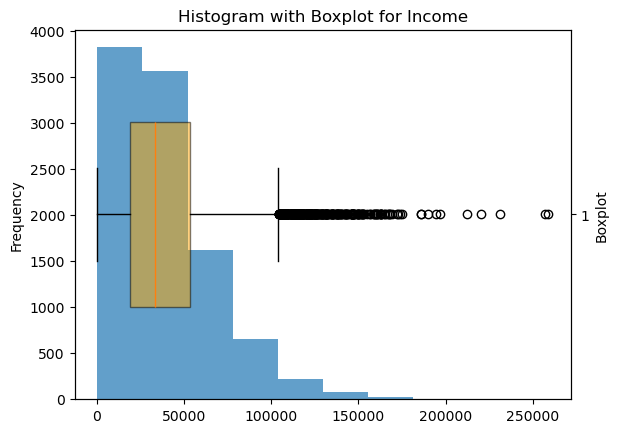

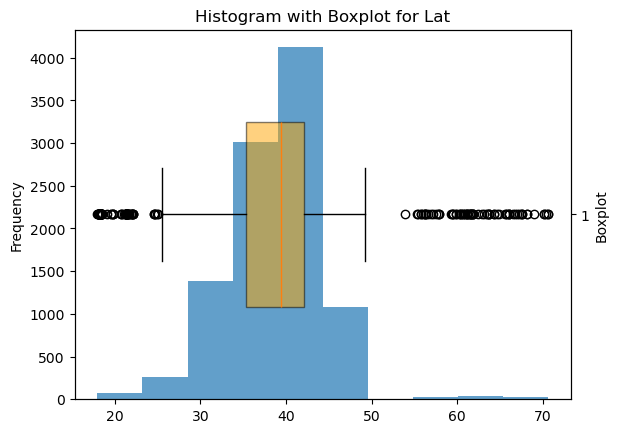

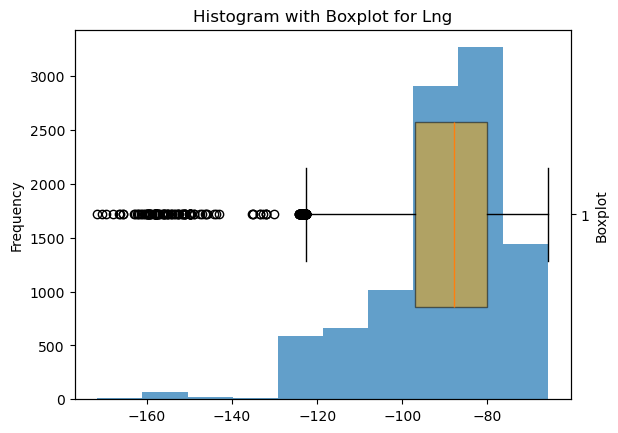

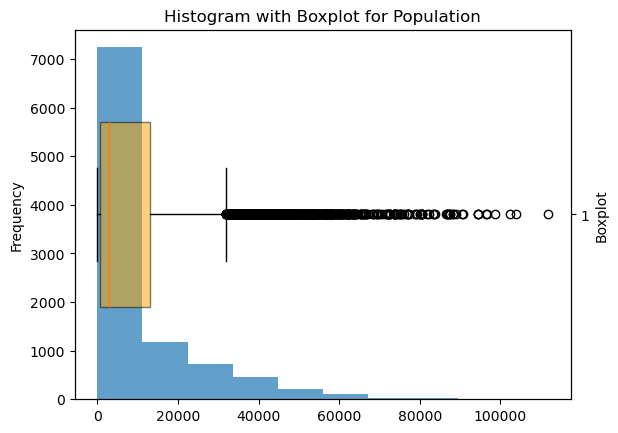

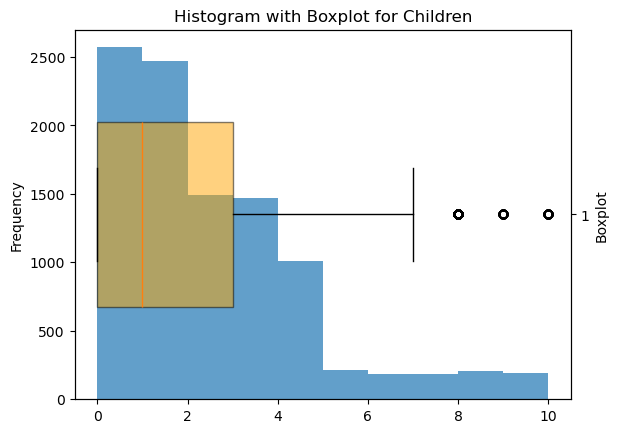

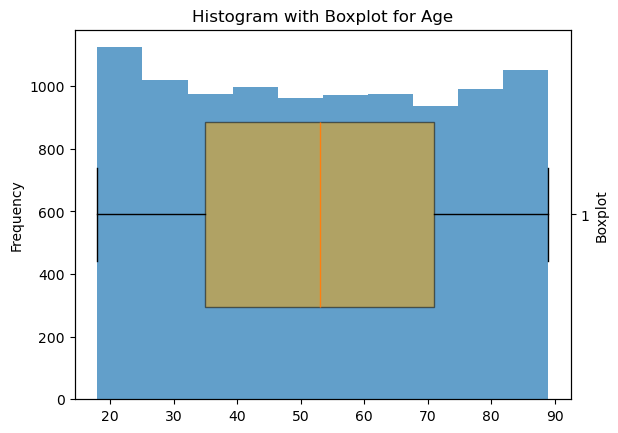

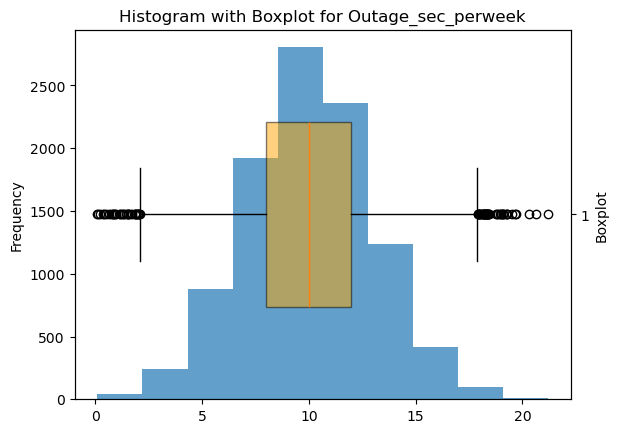

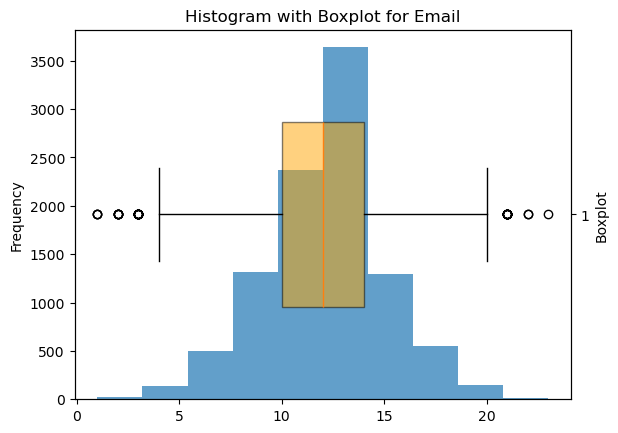

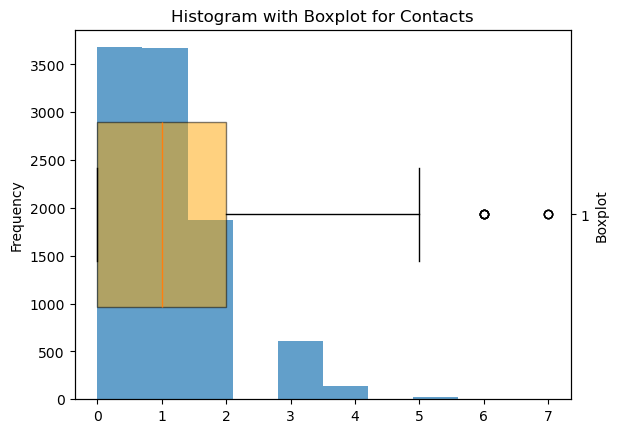

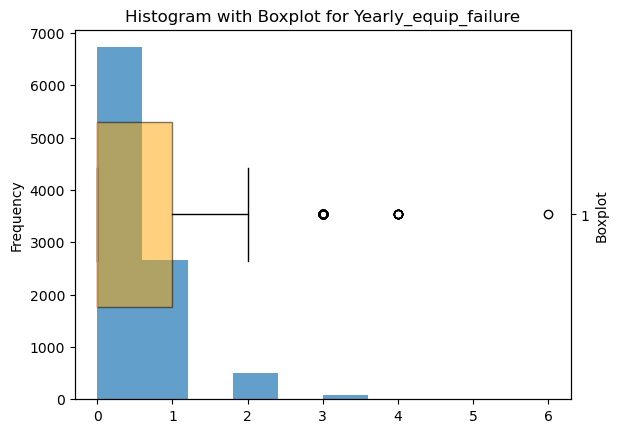

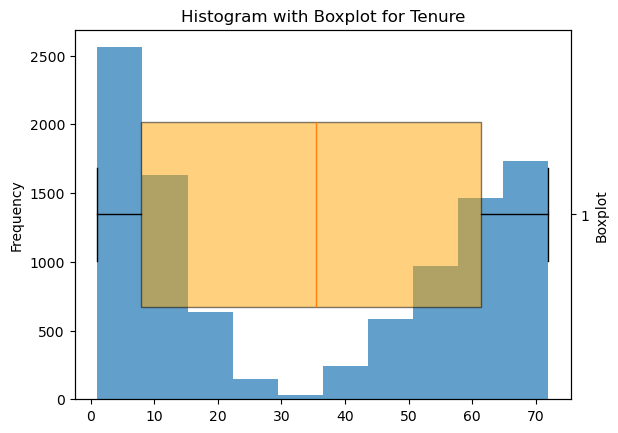

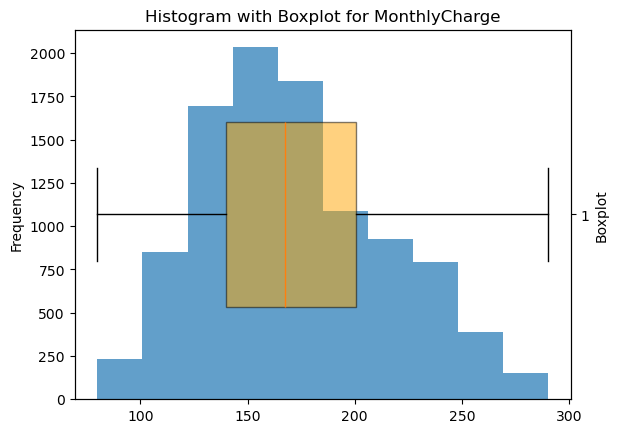

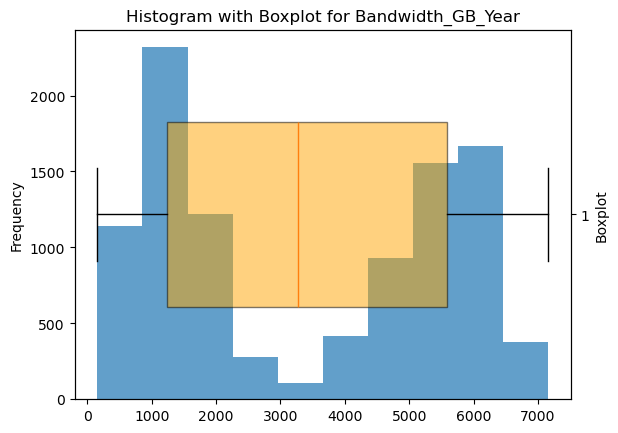

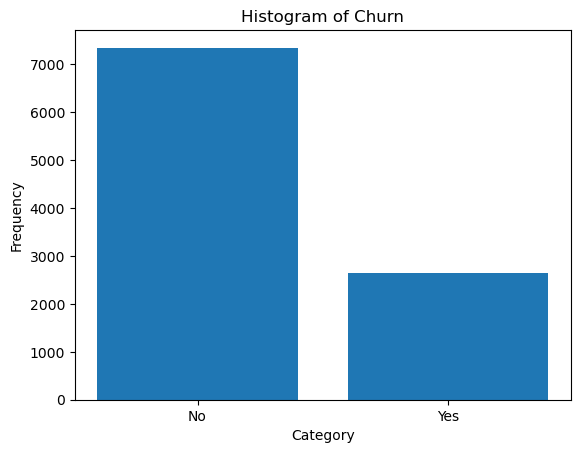

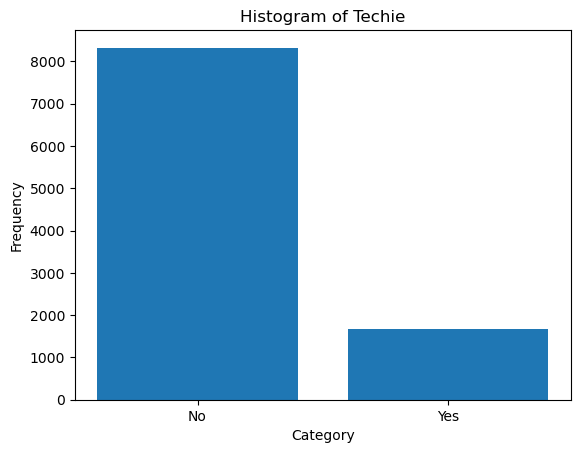

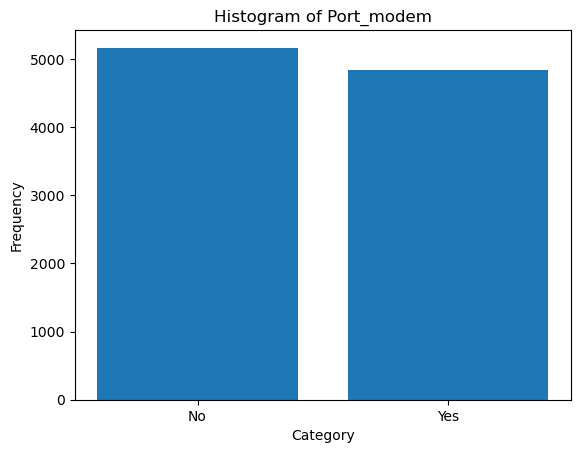

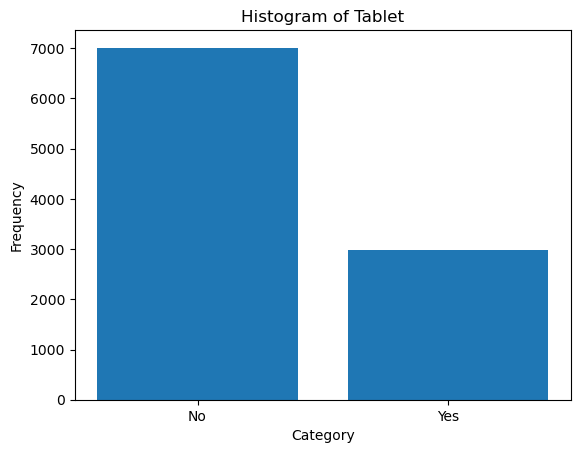

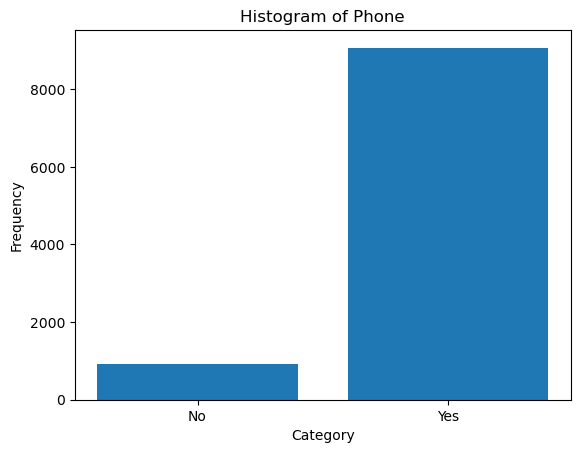

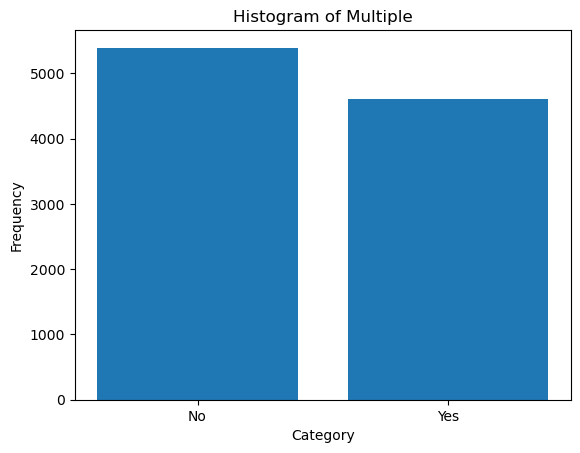

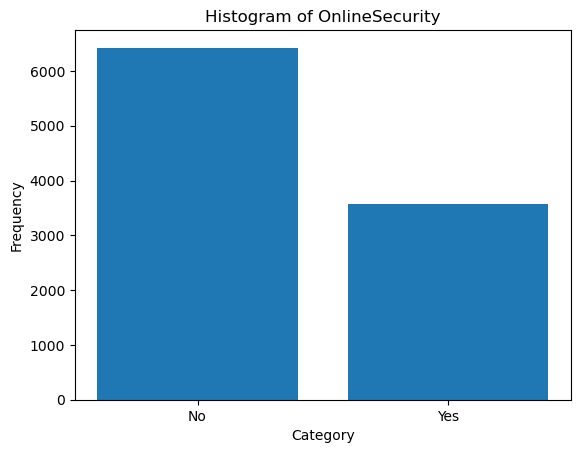

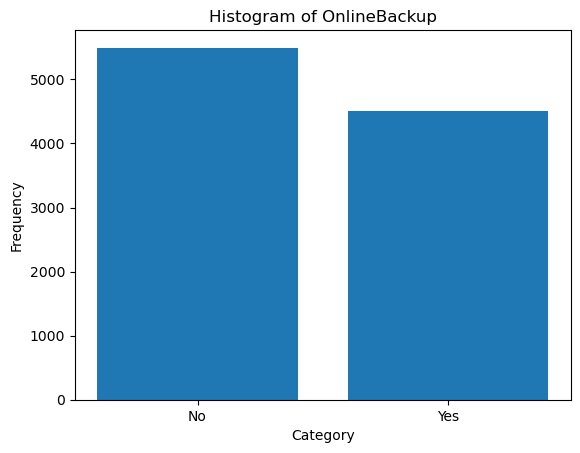

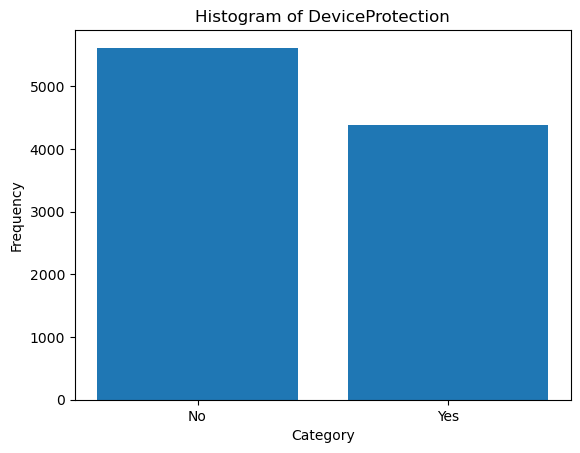

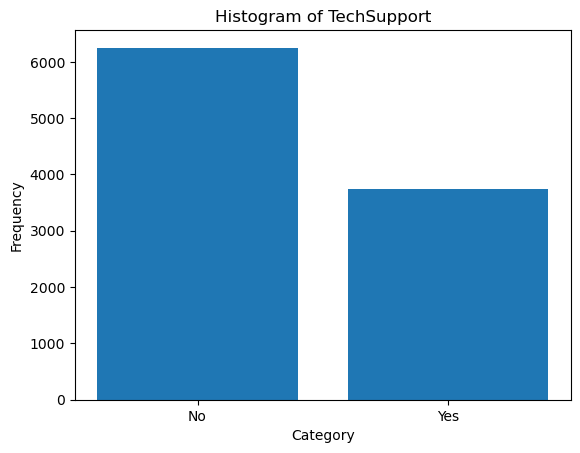

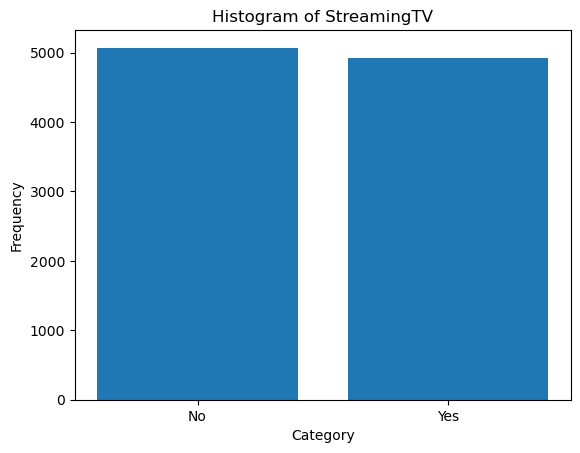

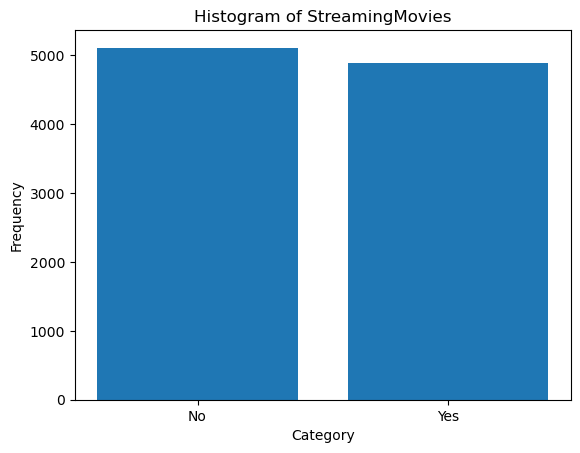

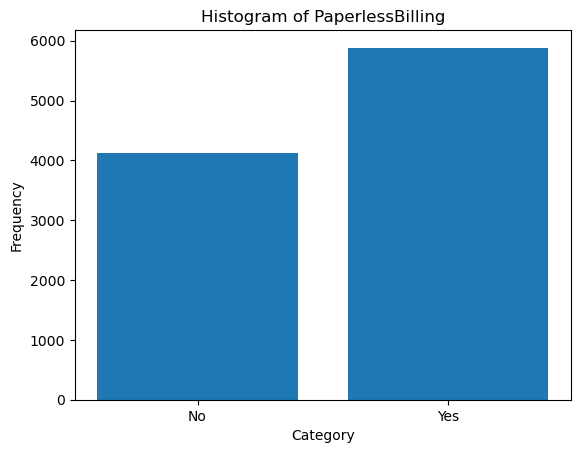

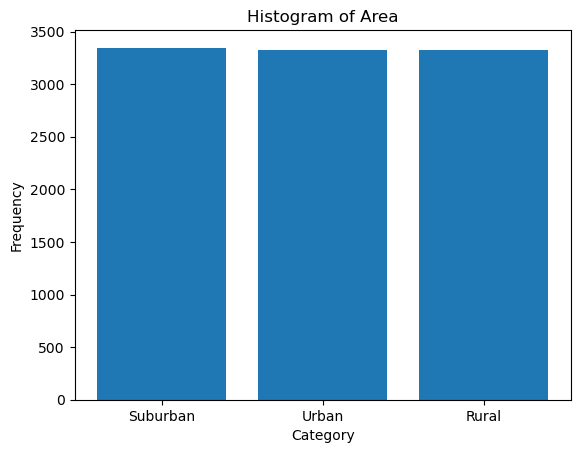

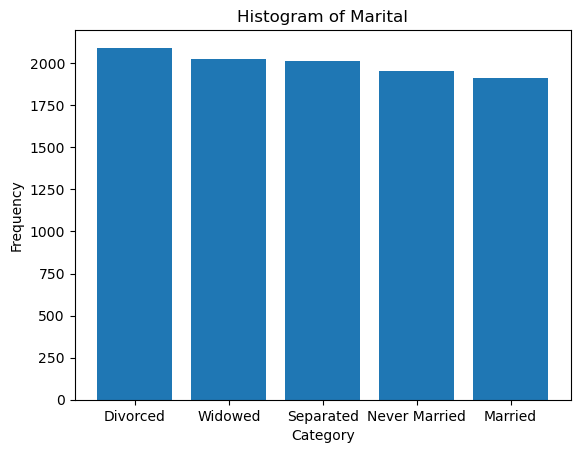

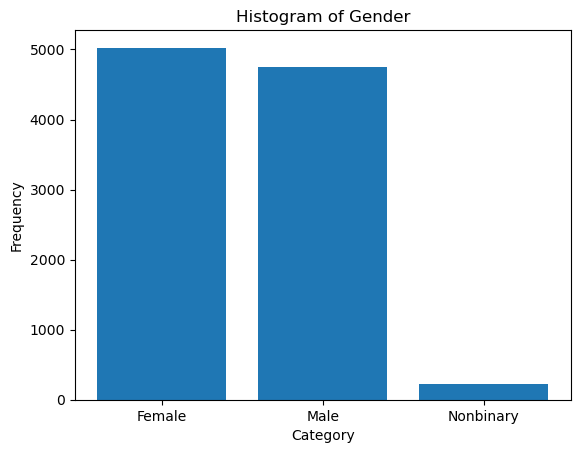

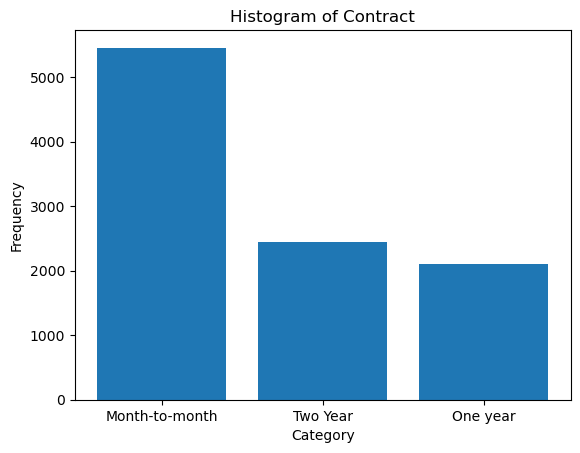

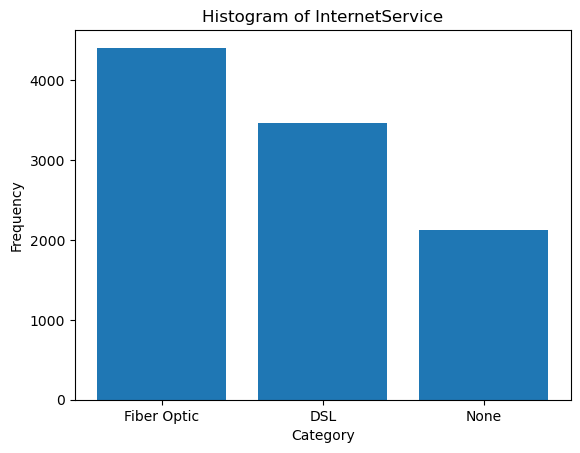

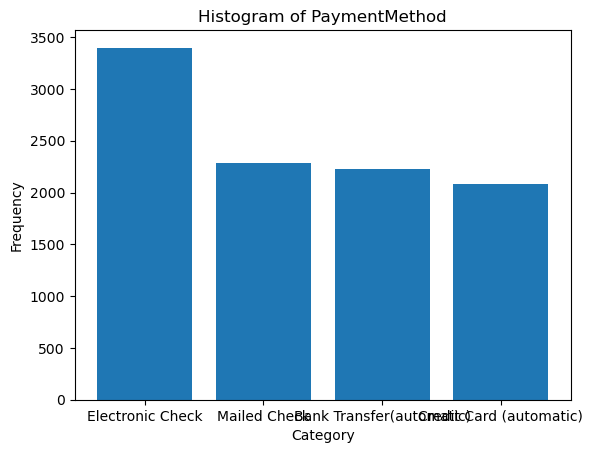

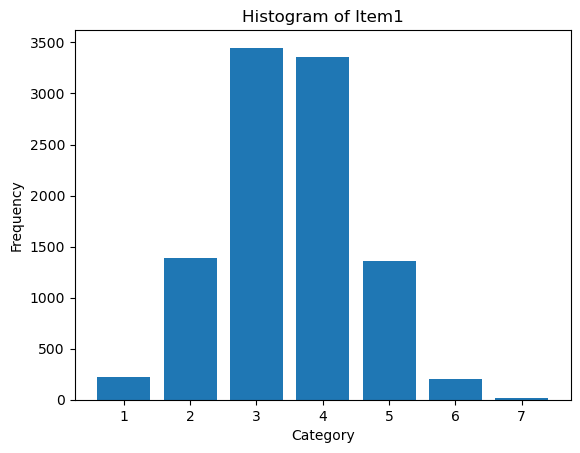

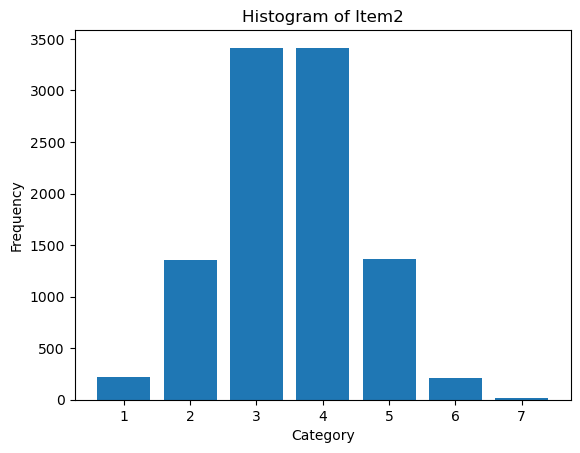

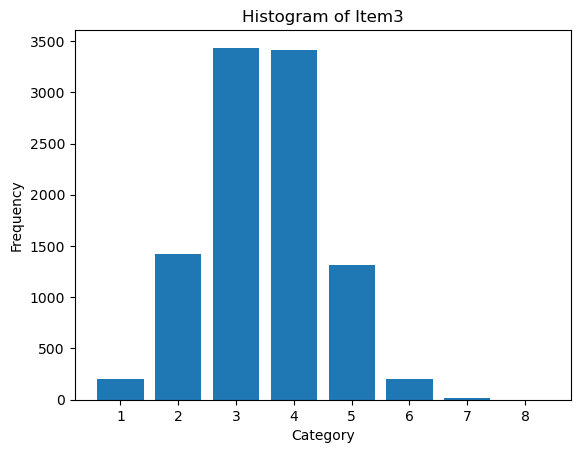

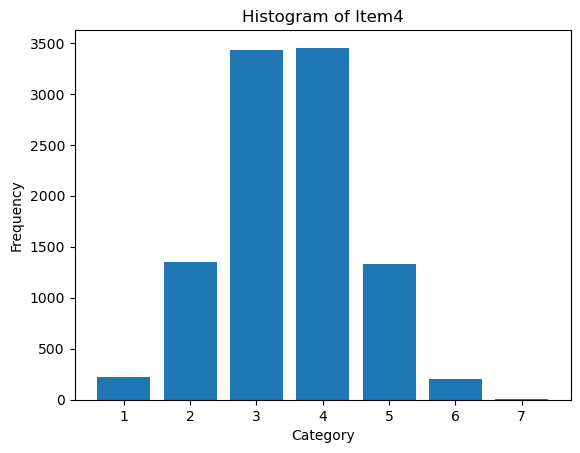

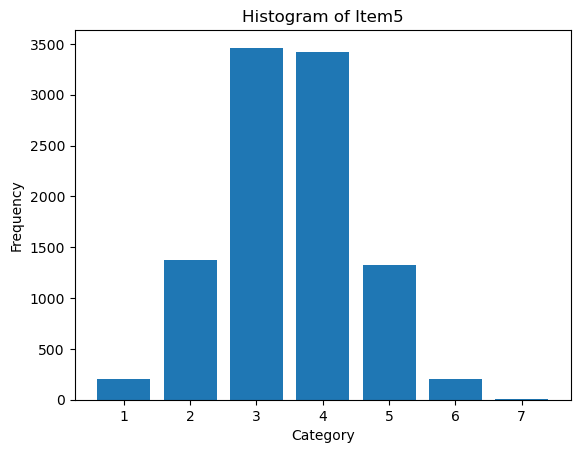

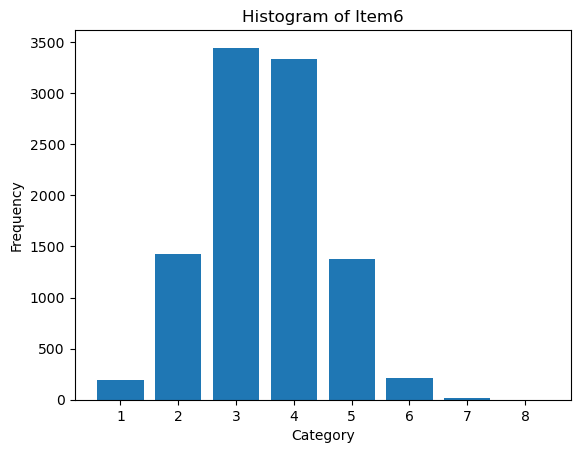

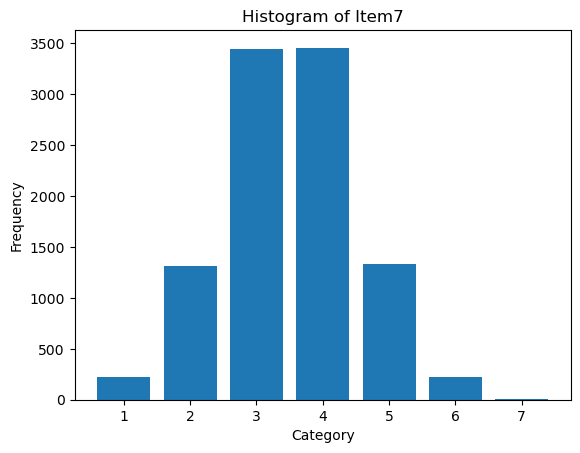

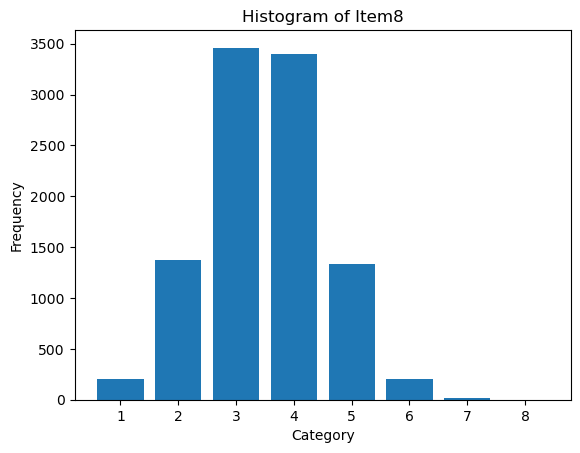

In [15]:
## C3 Univariate Visualizations
# Histograms + Boxplots for the dependent variable and 39 all independent variables:


plot_histobox(df, 'Income')


plot_histobox(df, 'Lat')

plot_histobox(df, 'Lng')

plot_histobox(df, 'Population')

plot_histobox(df, 'Children')

plot_histobox(df, 'Age')

plot_histobox(df, 'Outage_sec_perweek')

plot_histobox(df, 'Email')

plot_histobox(df, 'Contacts')

plot_histobox(df, 'Yearly_equip_failure')

plot_histobox(df, 'Tenure')

plot_histobox(df, 'MonthlyCharge')

plot_histobox(df, 'Bandwidth_GB_Year')


plot_binaryhist(df, 'Churn')

plot_binaryhist(df, 'Techie')

plot_binaryhist(df, 'Port_modem')

plot_binaryhist(df, 'Tablet')

plot_binaryhist(df, 'Phone')

plot_binaryhist(df, 'Multiple')

plot_binaryhist(df, 'OnlineSecurity')

plot_binaryhist(df, 'OnlineBackup')

plot_binaryhist(df, 'DeviceProtection')

plot_binaryhist(df, 'TechSupport')

plot_binaryhist(df, 'StreamingTV')

plot_binaryhist(df, 'StreamingMovies')

plot_binaryhist(df, 'PaperlessBilling')


plot_cathist(df, 'Area')

plot_cathist(df, 'Marital')

plot_cathist(df, 'Gender')

plot_cathist(df, 'Contract')

plot_cathist(df, 'InternetService')

plot_cathist(df, 'PaymentMethod')


plot_cathist(df, 'Item1')

plot_cathist(df, 'Item2')

plot_cathist(df, 'Item3')

plot_cathist(df, 'Item4')

plot_cathist(df, 'Item5')

plot_cathist(df, 'Item6')

plot_cathist(df, 'Item7')

plot_cathist(df, 'Item8')


In [16]:
## C3 Bivariate Visualizations

def plot_bivarcont(data_frame, col1, col2):
# Bivariate scatterplot of col2 vs col1
    
    plt.figure(figsize = (10,6))
    plt.scatter(data_frame[col1], data_frame[col2], s = 1)

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatterplot of {col2} vs {col1}')
    plt.show()
    

def plot_bivarcat(data_frame, cont_col, cat_col):
# Bivariate boxplot of continuous vs categorical

    data_frame.boxplot(column = cont_col, by = cat_col, grid = False)
    
    plt.title(f'Box Plot of {cont_col} by {cat_col}')
    plt.suptitle('') 
    plt.xlabel(cat_col)
    plt.ylabel(cont_col)
    plt.show()


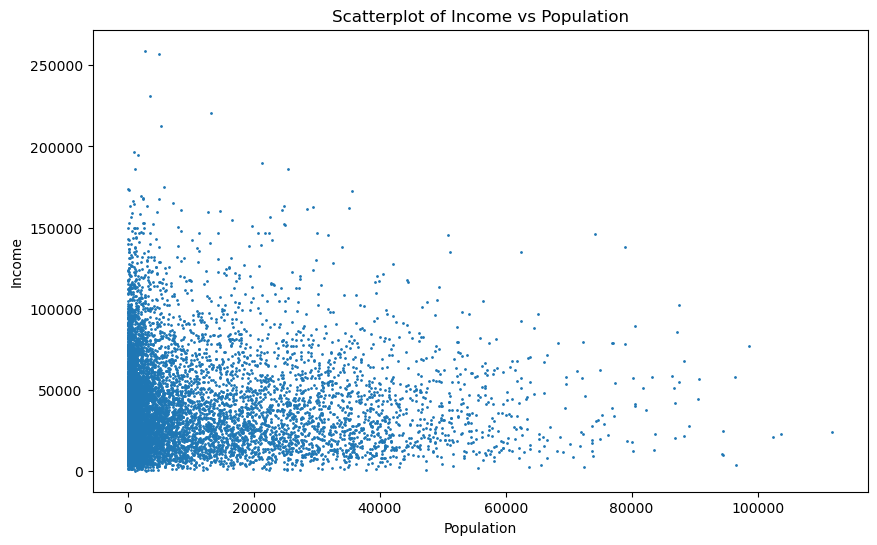

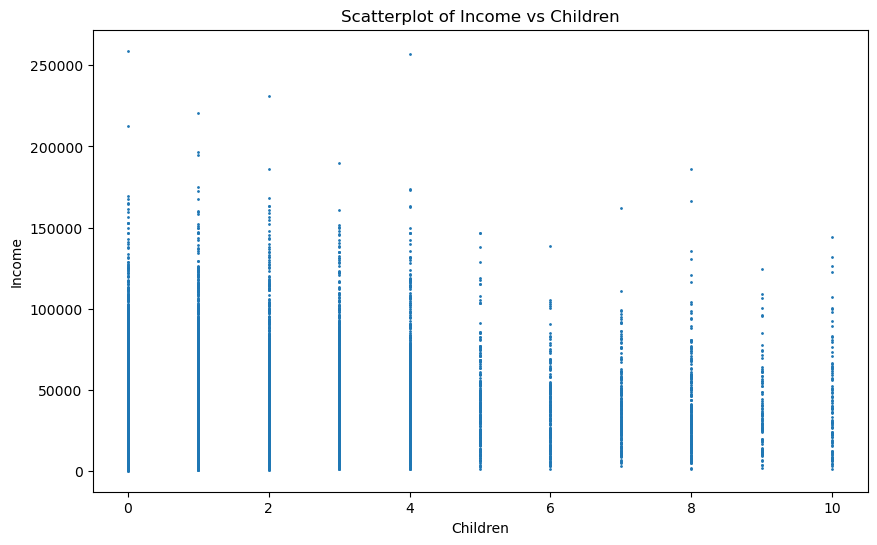

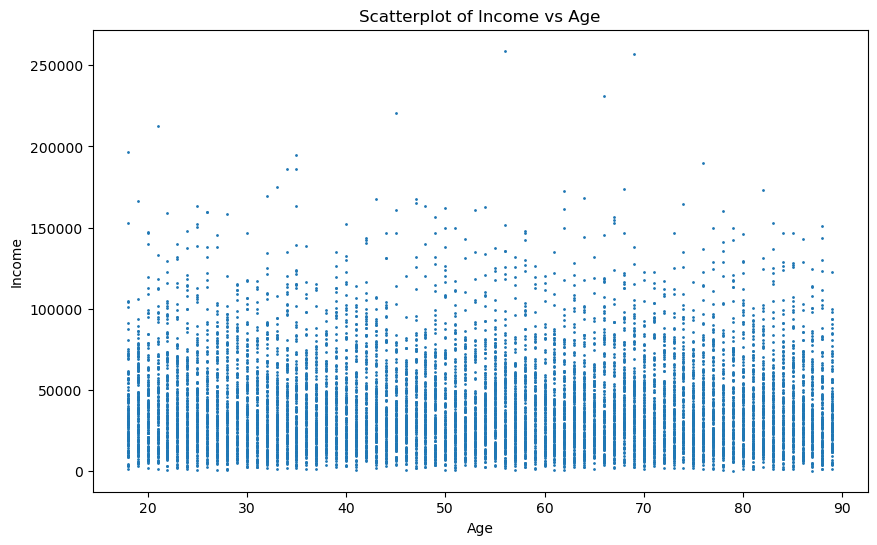

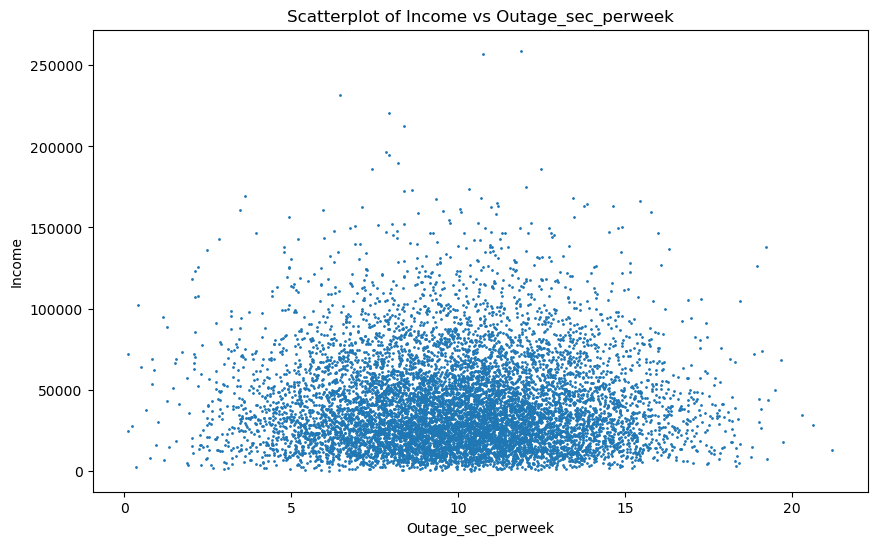

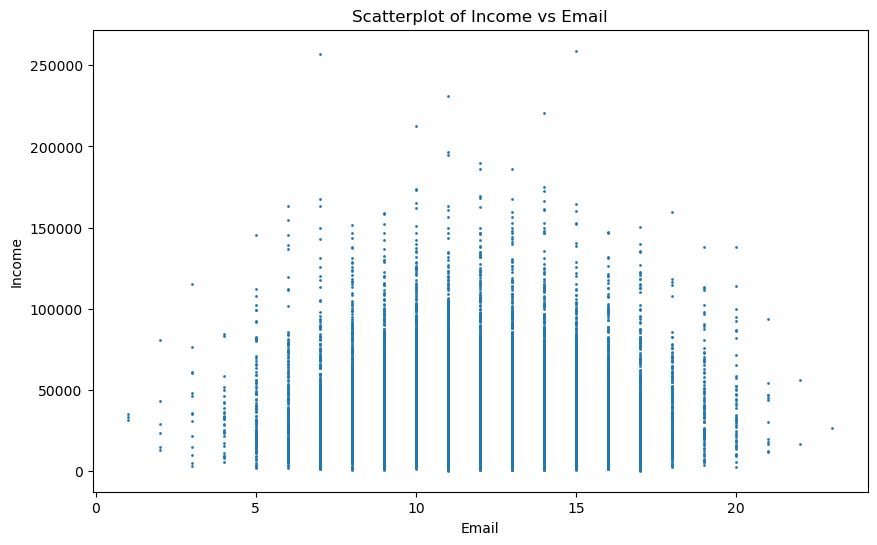

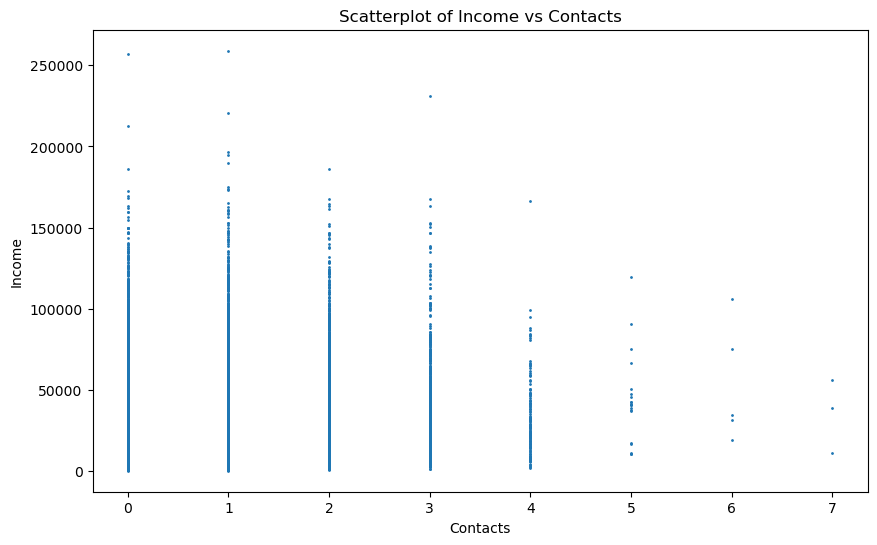

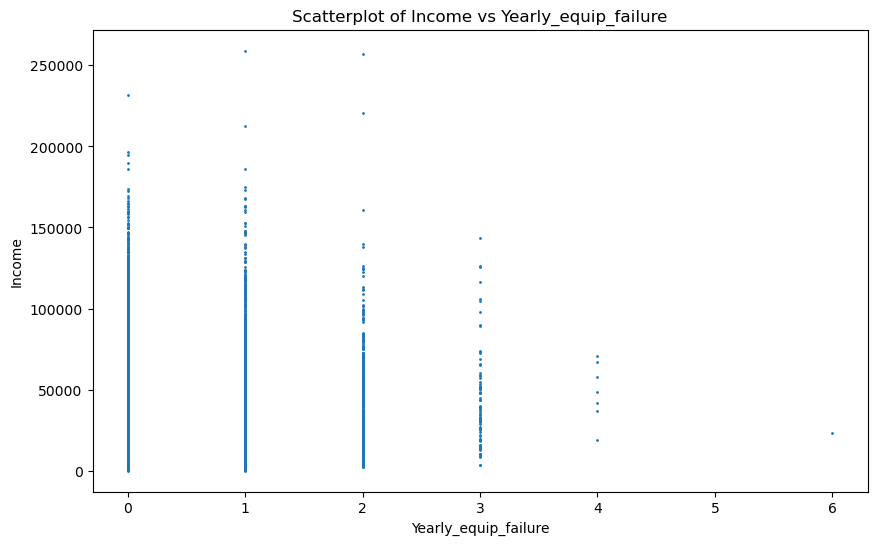

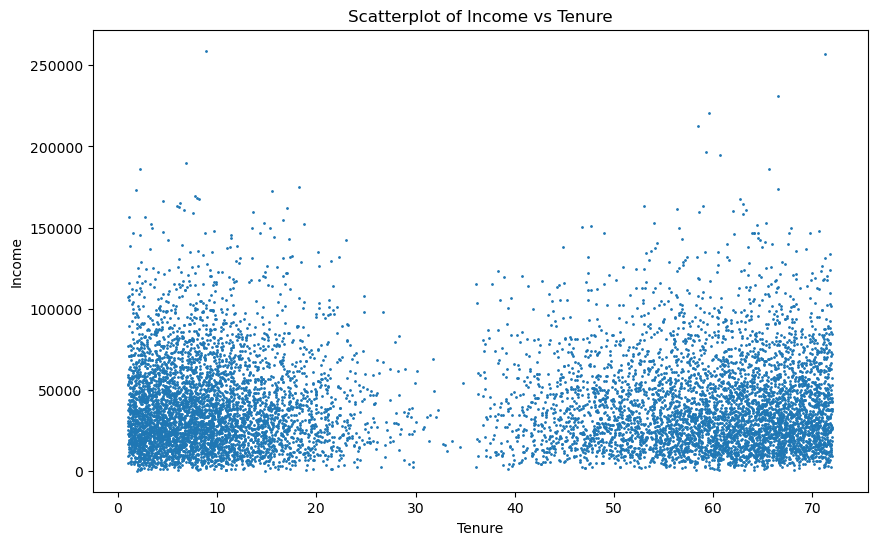

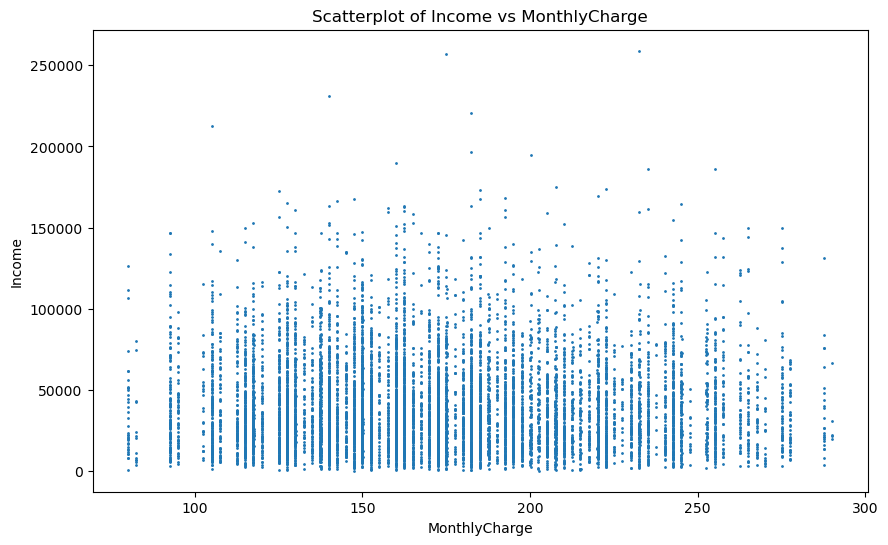

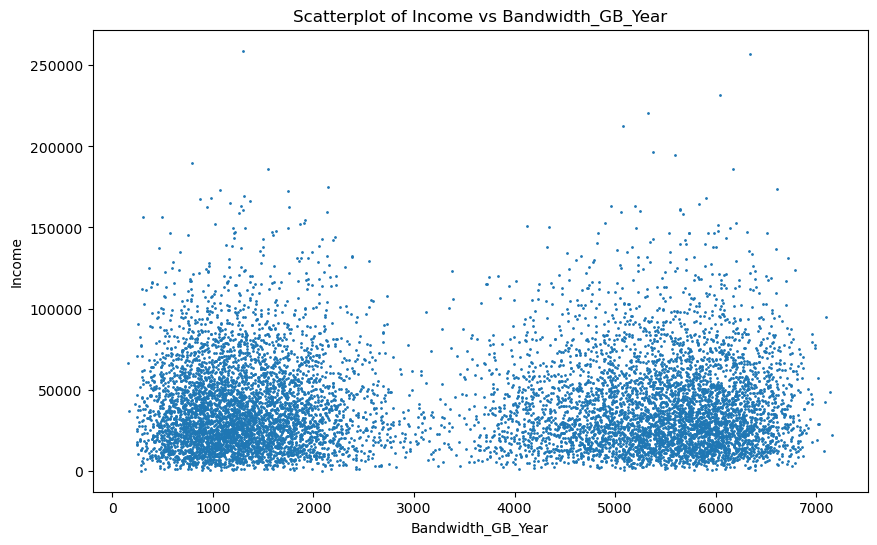

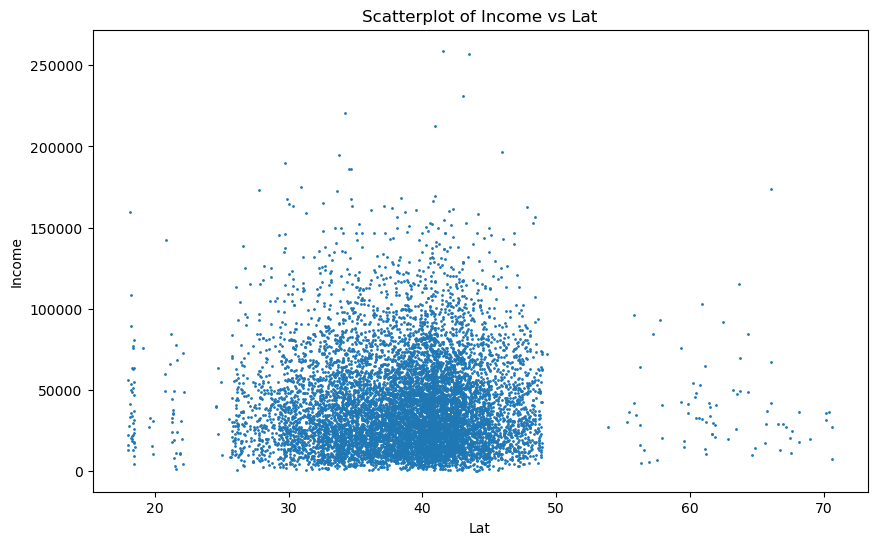

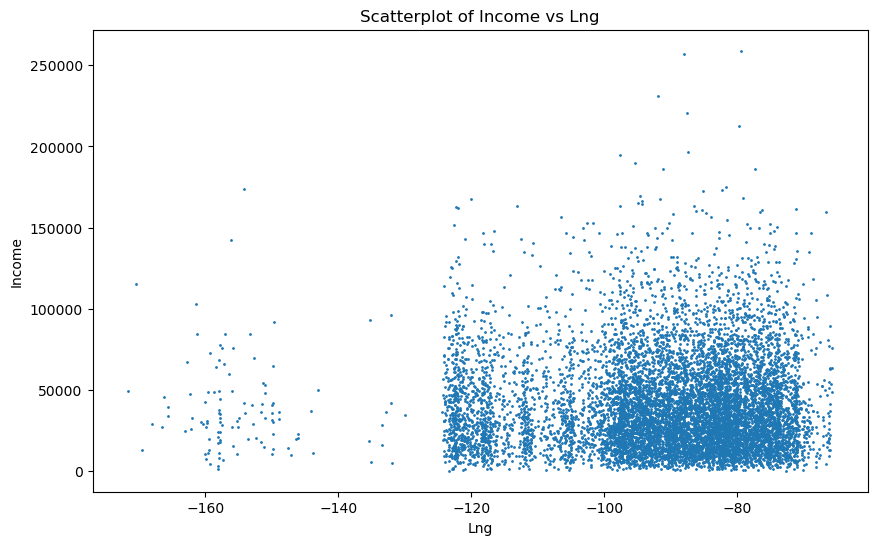

In [17]:
## C3 Bivariate Visualizations
# Scatterplots of Numeric Variables

plot_bivarcont(df, 'Population', 'Income')

plot_bivarcont(df, 'Children', 'Income')

plot_bivarcont(df, 'Age', 'Income')

plot_bivarcont(df, 'Outage_sec_perweek', 'Income')

plot_bivarcont(df, 'Email', 'Income')

plot_bivarcont(df, 'Contacts', 'Income')

plot_bivarcont(df, 'Yearly_equip_failure', 'Income')

plot_bivarcont(df, 'Tenure', 'Income')

plot_bivarcont(df, 'MonthlyCharge', 'Income')

plot_bivarcont(df, 'Bandwidth_GB_Year', 'Income')

plot_bivarcont(df, 'Lat', 'Income')

plot_bivarcont(df, 'Lng', 'Income')


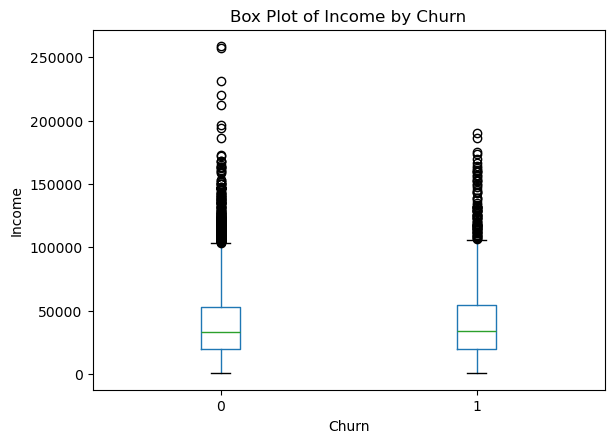

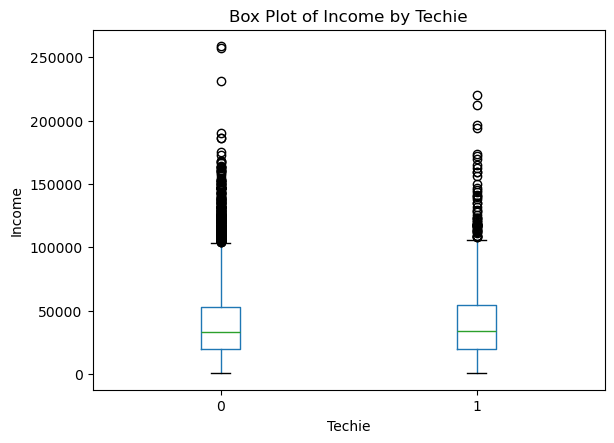

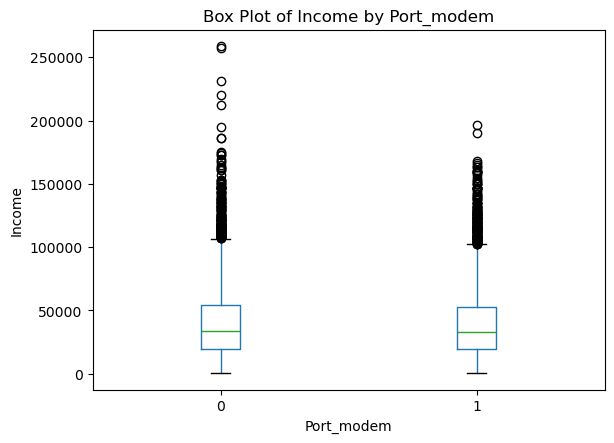

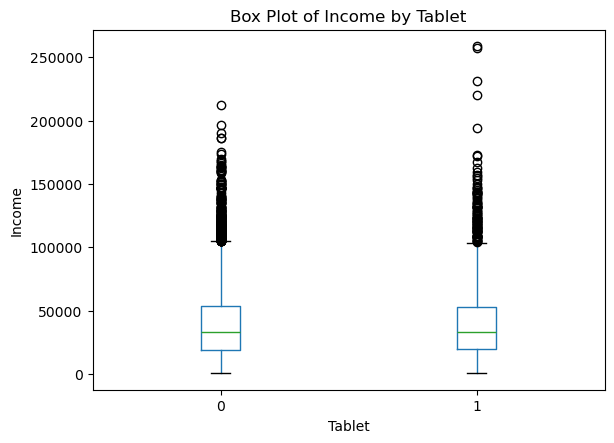

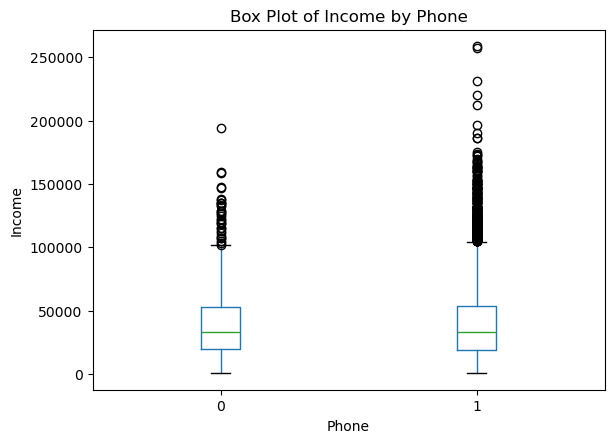

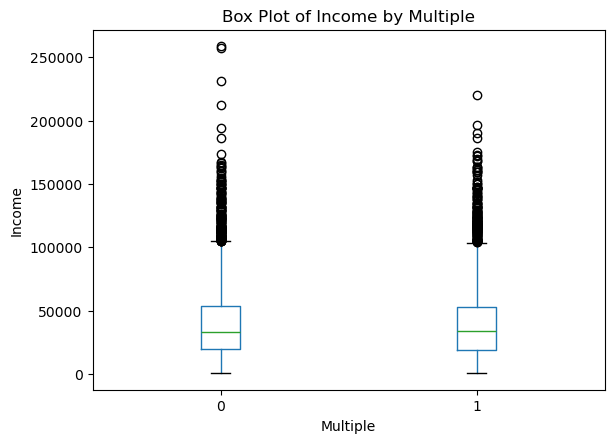

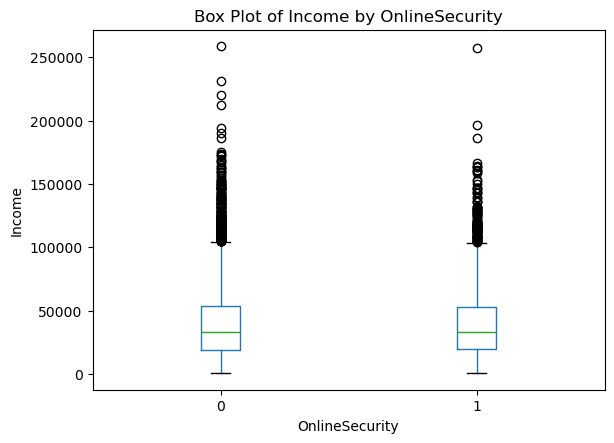

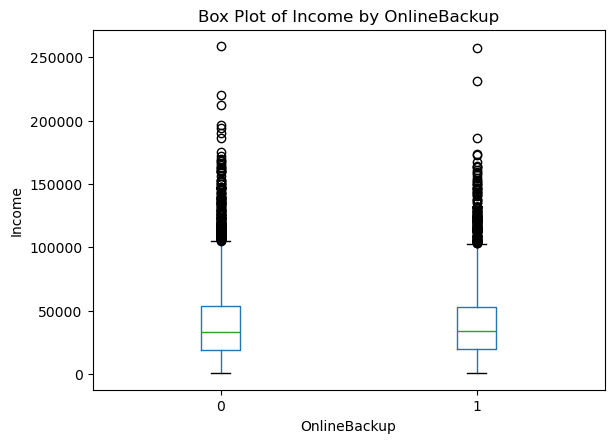

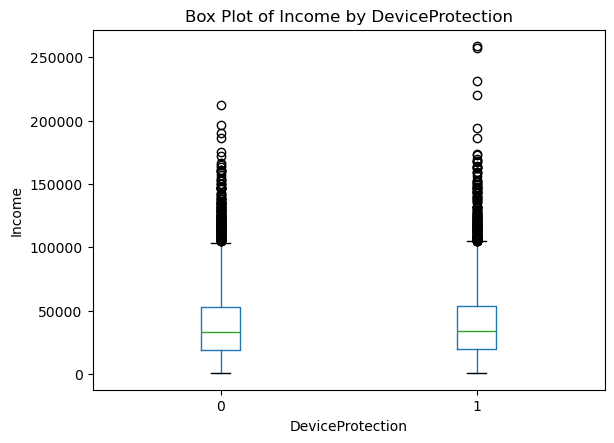

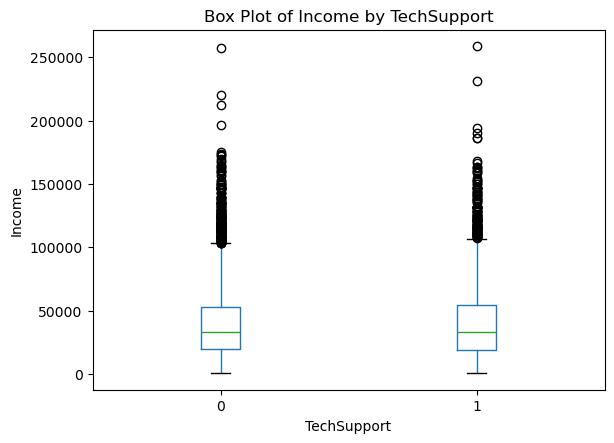

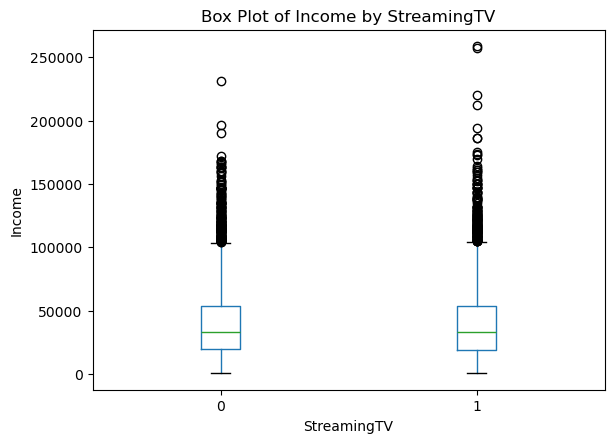

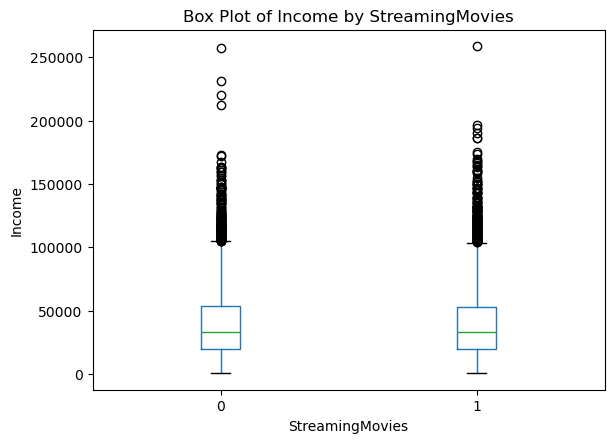

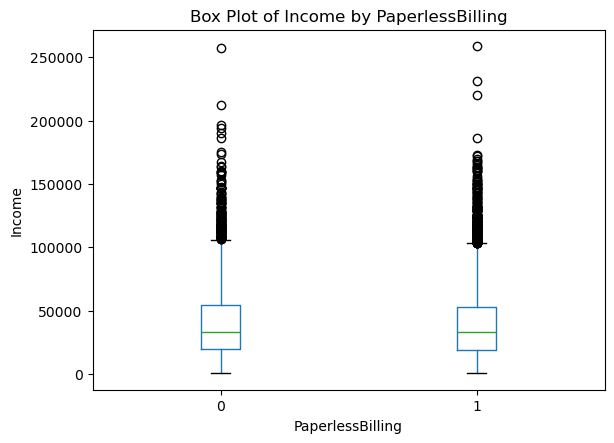

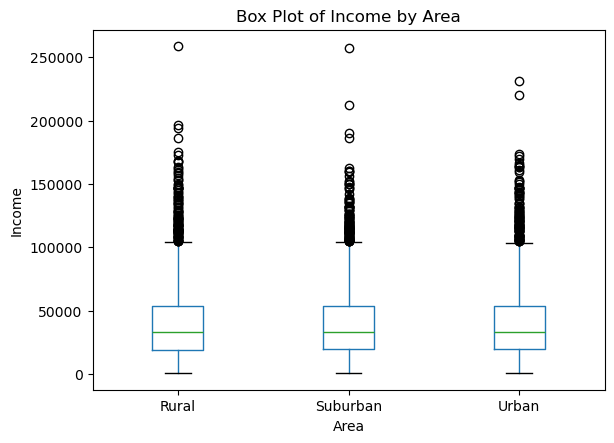

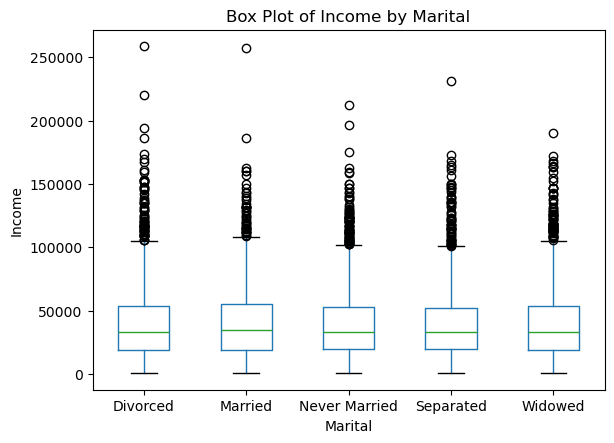

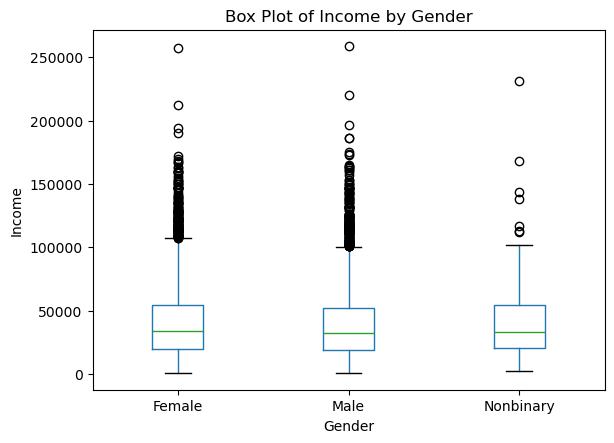

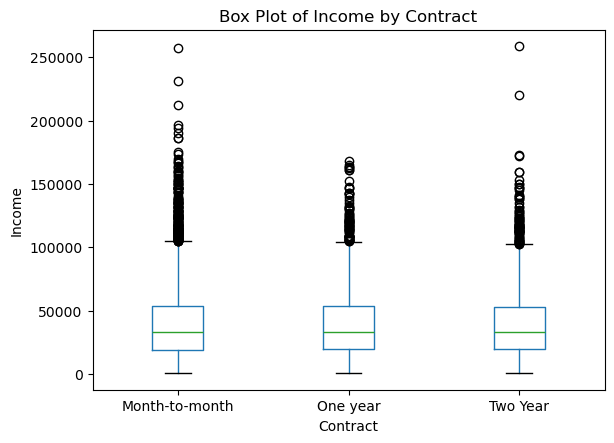

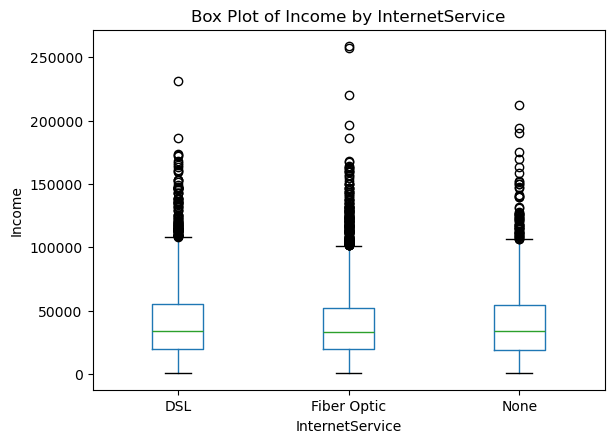

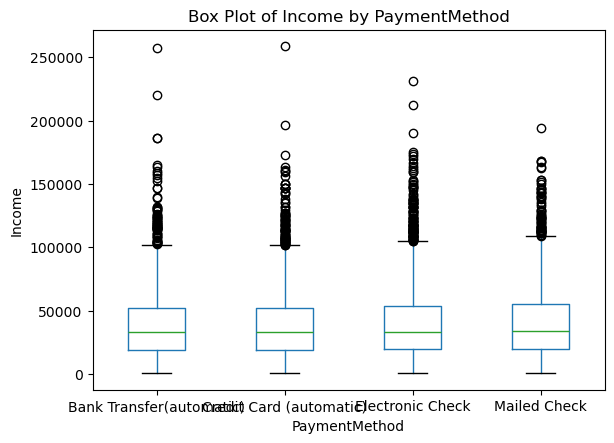

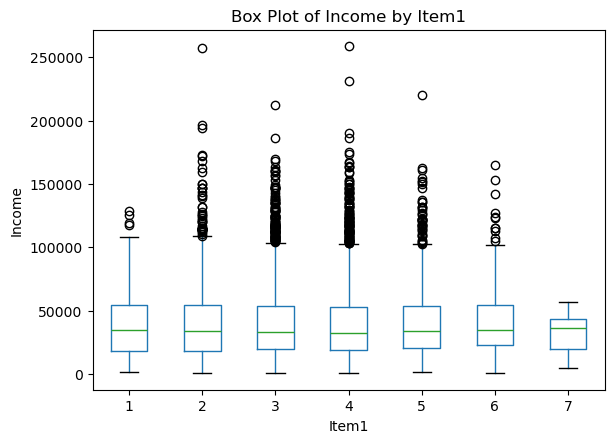

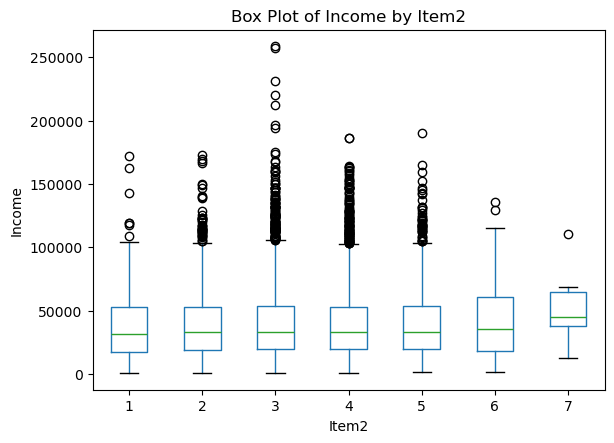

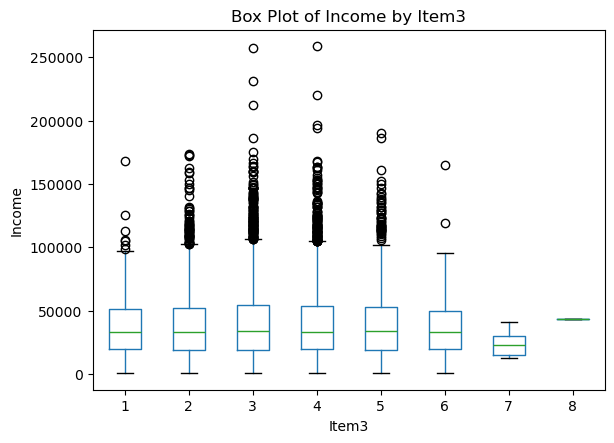

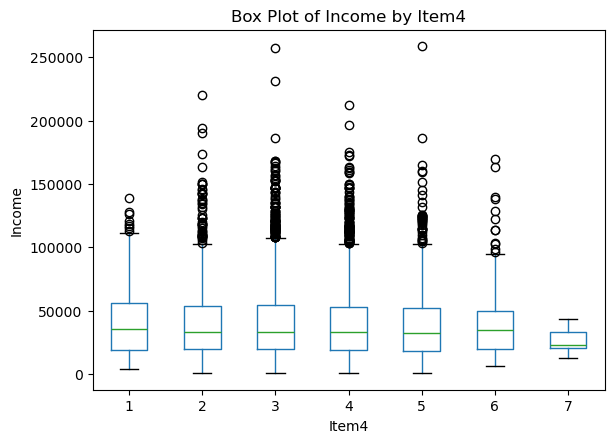

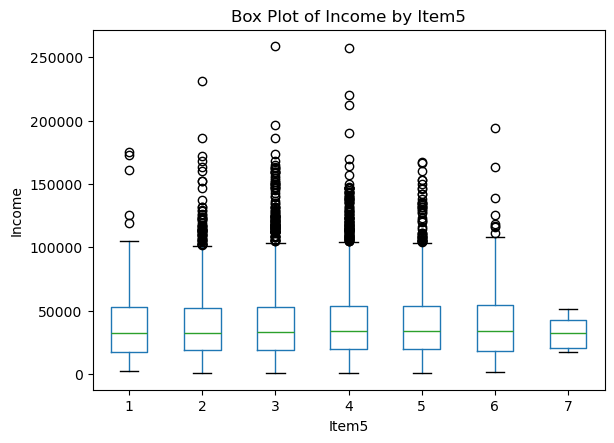

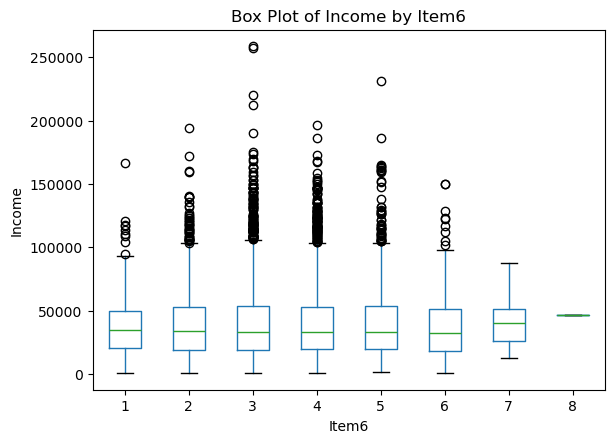

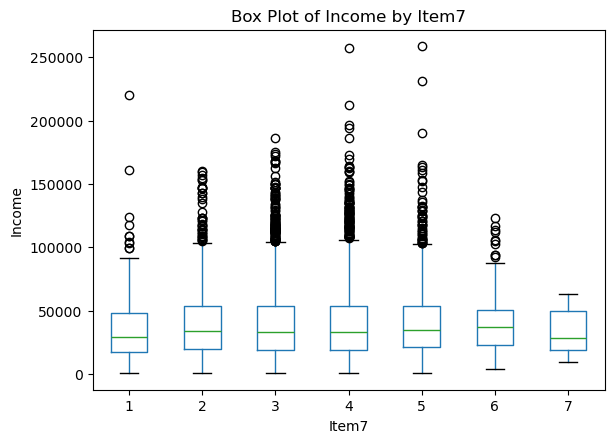

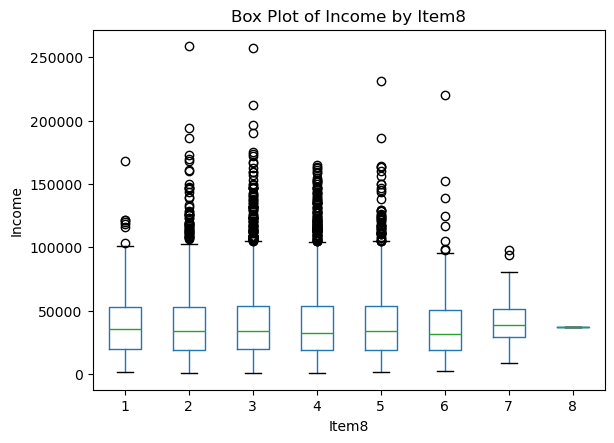

In [18]:
## C3 Bivariate Visualizations
# Boxplots of Dependent Variable vs Categorical Variables

plot_bivarcat(df, 'Income', 'Churn')

plot_bivarcat(df, 'Income', 'Techie')

plot_bivarcat(df, 'Income', 'Port_modem')

plot_bivarcat(df, 'Income', 'Tablet')

plot_bivarcat(df, 'Income', 'Phone')

plot_bivarcat(df, 'Income', 'Multiple')

plot_bivarcat(df, 'Income', 'OnlineSecurity')

plot_bivarcat(df, 'Income', 'OnlineBackup')

plot_bivarcat(df, 'Income', 'DeviceProtection')

plot_bivarcat(df, 'Income', 'TechSupport')

plot_bivarcat(df, 'Income', 'StreamingTV')

plot_bivarcat(df, 'Income', 'StreamingMovies')

plot_bivarcat(df, 'Income', 'PaperlessBilling')


plot_bivarcat(df, 'Income', 'Area')

plot_bivarcat(df, 'Income', 'Marital')

plot_bivarcat(df, 'Income', 'Gender')

plot_bivarcat(df, 'Income', 'Contract')

plot_bivarcat(df, 'Income', 'InternetService')

plot_bivarcat(df, 'Income', 'PaymentMethod')


plot_bivarcat(df, 'Income', 'Item1')

plot_bivarcat(df, 'Income', 'Item2')

plot_bivarcat(df, 'Income', 'Item3')

plot_bivarcat(df, 'Income', 'Item4')

plot_bivarcat(df, 'Income', 'Item5')

plot_bivarcat(df, 'Income', 'Item6')

plot_bivarcat(df, 'Income', 'Item7')

plot_bivarcat(df, 'Income', 'Item8')

### C4.  Description of Data Transformation Goals and Steps to Achieve Goals
The data wrangling performed on the data set consisted of the following:

- Re-expression of the thirteen binary variables by encoding True and False as 1 and 0, respectively. This was done using a for loop that applies `.replace()` to specific columns using a dictionary. The thirteen re-expressed binary variables:
    - `Churn`, `Techie`, `Port_modem`, `Tablet`, `Phone`, `Multiple`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `PaperlessBilling`
- Six categorical variable were re-expressed using one-hot encoding with `.get_dummies()` from Pandas. The six variables re-expressed variables:
    - `Area`, `Marital`, `Gender`, `Contract`, `InternetService`, `PaymentMethod`

See code attached, in D208_PA_MendezD_Task1_Revision1.ipynb.

### C5.  Prepared Data Set as CSV file

In [19]:
## C5 CSV Output

# Create explanatory variable data frame
expVars = pd.concat([numericVars, binaryVars, oneHotVars, ordinalVars], axis = 1)

preparedData = pd.concat([df['Income'], expVars], axis = 1)

# preparedData.to_csv('D208_PA_MendezD_Task1.csv', sep=',', encoding='utf-8', index=False)

# Part IV: Model Comparison and Analysis

## D. Comparison of Initial and Reduced Linear Regression Models

### D1. Initial Multiple Linear Regression Model

The following cells contain the code necessary to construct the initial MLR model with all 39 variables identified in C2. The summary of the initial model is printed below.

In [20]:
## D1 Initial MLR Model with 39 independent variables

import statsmodels.api as sm

# Create explanatory variable data frame
expVars = pd.concat([numericVars, binaryVars, oneHotVars, ordinalVars], axis = 1)

# Add intercept to the model
expVars_intercept = sm.add_constant(expVars)

# Assign 'Income' as the dependent variable
depVar = df['Income']

# Fit the intercept model
model_intercept = sm.OLS(depVar, expVars_intercept).fit()

# Print the model summary
print(model_intercept.summary())


                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9029
Date:                Thu, 04 Jul 2024   Prob (F-statistic):              0.664
Time:                        11:03:22   Log-Likelihood:            -1.1664e+05
No. Observations:               10000   AIC:                         2.334e+05
Df Residuals:                    9951   BIC:                         2.337e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### D2. Model Reduction Method and Justification

The model reduction method utilized below is backward stepwise elimination. Beginning with all explanatory variables, backwards elimination removes the least significant variable, as determined by p-value, at each iteration of the loop. This is iterated until no improvement is observed, or rather, no variables are observed to have $p > 0.05$ (Middleton, 2022). 


In [21]:
# D2 Model Reduction Method

def backward_elimination(data, target, siglevel):
# Function sourced from AnalyticsVidhya to perform Backwards Elimination

    features = data.columns.tolist()
    while(len(features) > 0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= siglevel):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [22]:
# D2 Model Reduction Method

backward_elimination(expVars, depVar, 0.05)

['Item4', 'Item7']

### D3. Reduced Model

Upon applying Backwards Elimination, the explanatory variables of the reduced model are:

- `Item4`
- `Item7`

Below is the code that constructs the reduced model with intercept and prints its summary.


In [23]:
# D3 Reduced Model

expVarsReduced = df[['Item4', 'Item7']]

expVarsReduced_intercept = sm.add_constant(expVarsReduced)

model_reduced = sm.OLS(depVar, expVarsReduced_intercept).fit()

print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.895
Date:                Thu, 04 Jul 2024   Prob (F-statistic):            0.00750
Time:                        11:03:26   Log-Likelihood:            -1.1665e+05
No. Observations:               10000   AIC:                         2.333e+05
Df Residuals:                    9997   BIC:                         2.333e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.03e+04   1275.080     31.606      0.0

## E.  Analysis Using Reduced Linear Regression Model
### E1.  Model Comparison using Model Evaluation Metrics

The initial model can be compared with the reduced model using AIC and the F statistic. The following comparisons can be drawn using the output of the code below.

- Adjusted $R^2$: Although very low, it increased from the initial model to the reduced model, so the variables add explanatory power to the regression (Middleton, 2022).
- AIC: Since the reduced model has a lower AIC, it has a better fit relative to the initial model.

In [24]:
## E1 Model Comparison

def modelCompare(initialModel, reducedModel):
# Prints a data frame as a table that compares model evaluation metrics for two regression models

    evalMetrics = {
        'Criteria': ['Adj R2', 'AIC', 'F stat', 'Prob (F-stat)'],
        'Initial': [initialModel.rsquared_adj, initialModel.aic, initialModel.fvalue, initialModel.f_pvalue],
        'Reduced': [reducedModel.rsquared_adj, reducedModel.aic, reducedModel.fvalue, reducedModel.f_pvalue]
    }

    em = pd.DataFrame(evalMetrics)
    print(em)

In [25]:
## E1 Model Comparison

modelCompare(model_intercept, model_reduced)

        Criteria        Initial        Reduced
0         Adj R2      -0.000466       0.000779
1            AIC  233373.797638  233315.467874
2         F stat       0.902921       4.895328
3  Prob (F-stat)       0.663710       0.007499


### E2. Residual Plots and Model's Residual Standard Error

Below is the code that generate the Q-Q plot, the histogram of the model's residuals, as well as the model's residual standard error.

The residual standard error is shown below to be 28187.53.

In [26]:
## E2 Residual Plots and RSE

import numpy as np

def residualPlots(model):
    # Takes the model and returns the Q-Q plot, the histogram of the residuals, and the RSE.
    
    residuals = model.resid
    
    sm.qqplot(residuals, line = '45')
    plt.title('Q-Q Plot of Residuals')
    plt.show()
    
    plt.hist(residuals, bins = 30, edgecolor = 'k', alpha = 0.7)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()
    
    rse = np.sqrt(np.sum(residuals**2) / (len(residuals) - 2))
    print(f'The RSE is {rse}')

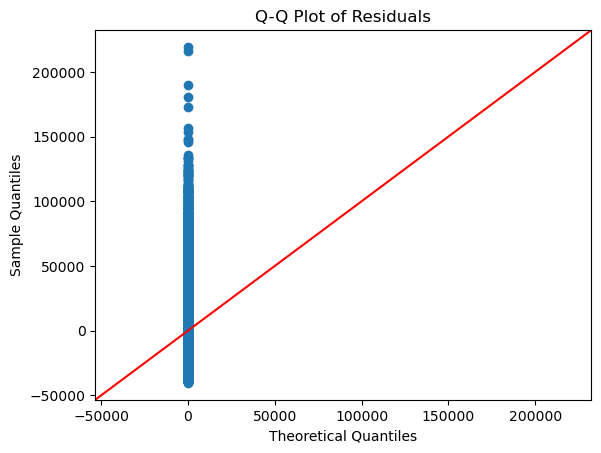

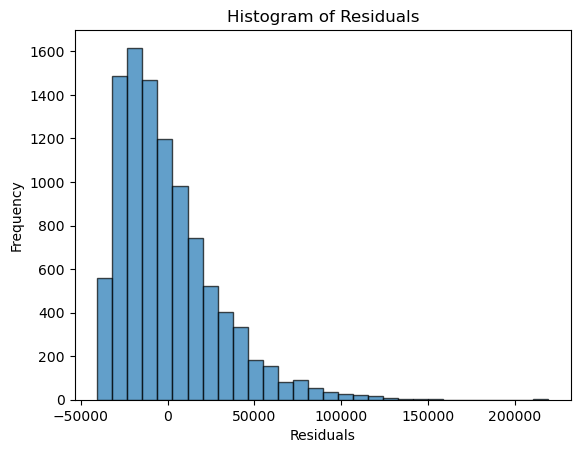

The RSE is 28187.527461290818


In [27]:
## E2 Residual Plots and RSE

residualPlots(model_reduced)

### E3. Code

See code attached, in D208_PA_MendezD_Task1_Revision1.ipynb

# Part V: Data Summary and Implications
## F. Summary of Findings
### F1. Results of Data Analysis

- Regression Equation for the Reduced Model
\begin{equation*}
\begin{aligned}
Income = & 40299.8 - 743.2(Item4) + 600.22(Item7)
\end{aligned}
\end{equation*}


- Interpretation of the Coefficients of the Reduced Model
    - All else constant, a customer's response to `Item4` is associated with an average decrease of \$743.20 in income. The higher the value of the survey response, the more income will decrease.
    - All else constant, a customer's response to `Item7` is associated with an average increase of \$600.22 in income. The higher the value of the survey response, the more income will increase.
    - All else constant, the model assumes a customer begins with \$40299.80 of income.
- Statistical and Practical Significance of the Reduced Model
    - As shown in E1, the F statistic is small, but with a p-value of $p = 0.007499$, at $\alpha = 0.05$, there is evidence to conclude that the model is statistically significant. However, the model may lack practical significance, because it is unlikely that two ordinal variables alone will be accurate predictors of a customer's income.
- Limitations of the Data Analysis
    - A major limitation of this data analysis is the assumption that any of these explanatory variables have a causal relationship between them and the dependent variable. Another issue is that the residuals do not appear to be normally distributed, as they are skewed right. Additionally, with only two ordinal explanatory variables, the model likely has poor predictive performance.


In [28]:
## F1 Regression Equation Coefficients

coefficients = model_reduced.params
print('Coefficients:')
print(coefficients)

Coefficients:
const    40299.803319
Item4     -743.203011
Item7      600.221109
dtype: float64


### F2. Course of Action

Since the model has much room for improvement, my recommended course of action would be to seek alternative customer information that might be associated with income. 

# Part VI: Demonstration

## G. Panopto Video

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c37f6c20-35a4-4b1f-b593-b1a1001680f1

## H. Acknowledgement of Web Sources

pandas.get_dummies — pandas 2.2.2 documentation. (n.d.). https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

Getting started - statsmodels 0.15.0 (+73). (n.d.). https://www.statsmodels.org/devel/gettingstarted.html

Verma, V. (2020, October 24). Feature Selection using Wrapper Method - Python Implementation. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/


## I. Acknowledgement of Sources

Karir, R. (2022, March 16). 4 main assumptions in Multi-Linear Regression. LinkedIn. https://www.linkedin.com/pulse/4-main-assumptions-multi-linear-regression-ritik-karir/

Middleton, K. (2022, November). D208 - Webinar Getting Started with D208 Part I. WGU. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970

Middleton, K. (2022, November). D208 - Webinar Getting Started with D208 Part II. WGU. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39bbe2db-de7d-4bf5-913b-af5c0003da9d
